#**Project: Outlier Detection in Financial Data for Fraudulent Activity Identification**

**Team: TEAM-03: THUNDER**

Team Members:

*   Aayan
*   Mihir Pandya
*   Manish
*   Shashwat Sharma (Leader)

Dataset : - https://www.kaggle.com/datasets/kartik2112/fraud-detection/data



**Problem Statement**

The clustering model aims to group transaction data to uncover patterns, detect anomalies, and potentially flag fraudulent activities. Objectives include segmenting customers based on spending behavior, analyzing merchants, and identifying geographic or behavioral irregularities. This helps banks enhance fraud detection, personalize services, and improve risk management using transaction data insights.



**Data Description**

The dataset contains transaction records, including details like transaction amount, merchant, category, location, and timestamps, as well as customer demographics (age, gender, job) to analyze and identify fraudulent activities.




**Columns Description**
- Unnamed: 0: An index column, likely redundant for analysis.
- trans_date_trans_time: Timestamp indicating the date and time of the transaction.
- cc_num: The credit card number associated with the transaction.
- merchant: Name of the merchant or store where the transaction occurred. Fraudulent merchants are prefixed with "fraud".
- category: Category of the transaction, such as personal care, health fitness, travel, etc.
- amt: The amount involved in the transaction.
- first: First name of the cardholder.
- last: Last name of the cardholder.
- gender: Gender of the cardholder.
- street: Street address of the cardholder.
- city: City of the cardholder.
- state: State of the cardholder.
- zip: ZIP code of the cardholder's address.
- lat: Latitude of the cardholder's location.
- long: Longitude of the cardholder's location.
- city_pop: Population of the cardholder's city.
- job: Job title or profession of the cardholder.
- dob: Date of birth of the cardholder.
- trans_num: Unique identifier for the transaction.
- unix_time: Timestamp of the transaction in UNIX format.
- merch_lat: Latitude of the merchant's location.
- merch_long: Longitude of the merchant's location.
- is_fraud: A binary indicator where 1 represents a fraudulent transaction and 0 represents a legitimate transaction.


This dataset is useful for clustering based on transaction behaviors, geographic details, and customer demographic information to detect patterns and potentially group similar transactions together for deeper analysis


In [84]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns
import warnings
from scipy.stats import gaussian_kde
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2
warnings.filterwarnings('ignore')

In [9]:
df1 = pd.read_csv('fraudTrain.csv')
df2 = pd.read_csv('fraudTest.csv')

In [10]:
df = pd.concat([df1,df2],ignore_index=True)

In [11]:
df.shape

(1852394, 23)

In [12]:
df = df.drop(columns='Unnamed: 0')

In [13]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [14]:
df["cc_num"].value_counts()

,count
cc_num,
6538441737335434,4392
30270432095985,4392
6538891242532018,4386
4364010865167176,4386
4642255475285942,4386
...,...
4714017207228610634,7
4352307151555405069,7
180097223252063,7


## Droping unnecessary features

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

Here first we will remove is_fraud From our dataset so we can apply unsupervised learning algorithms and later we can compare it as an evaluation metric

In [17]:
df = df.drop(columns = ['first','last','street','merchant','city','state','trans_num','unix_time','is_fraud'])

we have no use of them so we drop them

### **BASIC PREPROCESSING**

## Manipulating year, month , day and time of transaction from trans_date_trans_time

In [18]:
def date_manipulation(data):

  return data.split(' ')[0]

df['trans_date'] = df['trans_date_trans_time'].apply(date_manipulation)


In [19]:
def transaction_time(data):

  return data.split(' ')[1]

df['tans_time'] = df['trans_date_trans_time'].apply(transaction_time)

In [20]:
df['transaction_hour'] = pd.to_datetime(df['tans_time']).dt.hour



In [21]:
df["transaction_hour"].value_counts()

,count
transaction_hour,
23,95902
22,95370
16,94289
18,94052
21,93738
17,93514
13,93492
15,93439
19,93433


In night people have more transaction

# Define day and night based on hour

In [22]:
df['day_night'] = df['transaction_hour'].apply(lambda x: '1' if 6 <= x < 18 else '0')

If time is between 6 am to 6 pm then it will consider as day other wise it will night

## Count the number of transactions per hour

In [23]:
transactions_per_hour = df.groupby('transaction_hour').size()
transactions_per_hour = transactions_per_hour.reindex(range(24), fill_value=0)


Groups transactions by hour and counts occurrences, ensuring all 24 hours are represented with missing hours filled as 0.

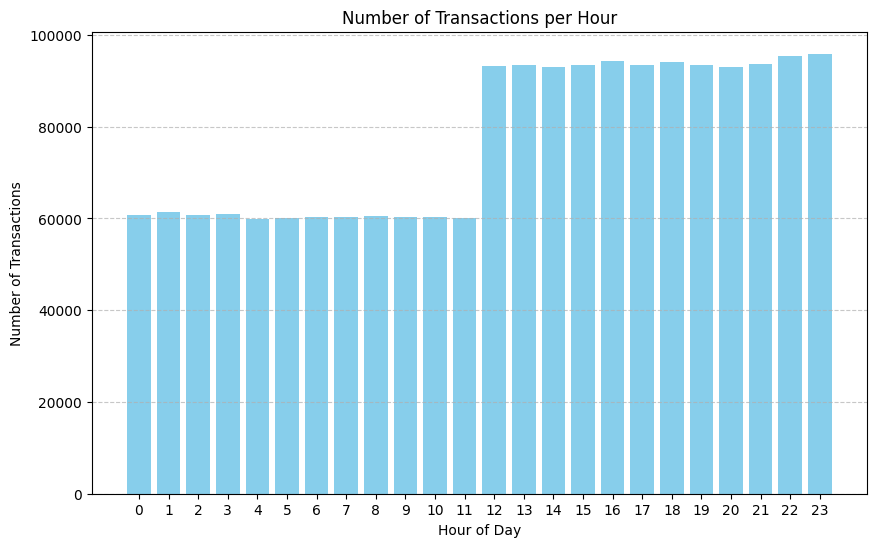

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(transactions_per_hour.index, transactions_per_hour.values, color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Hour')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




The bar chart illustrates the distribution of transactions across different hours of the day.  A clear peak in transaction volume is observed during noon,night hours, suggesting higher activity during this period.


In [25]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])


In [26]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'category', 'amt', 'gender', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat', 'merch_long',
       'trans_date', 'tans_time', 'transaction_hour', 'day_night'],
      dtype='object')

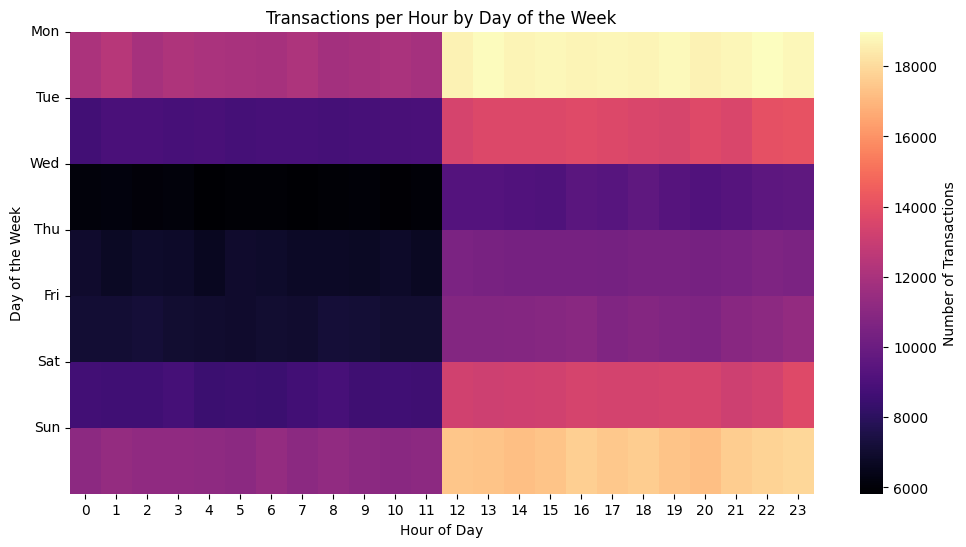

In [27]:
df['transaction_day_of_week'] = df['trans_date_trans_time'].dt.dayofweek

transactions_per_hour_day = df.groupby(['transaction_day_of_week', 'transaction_hour']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(transactions_per_hour_day, cmap='magma', annot=False, fmt="d", cbar_kws={'label': 'Number of Transactions'})
plt.xlabel('Hour of Day')
plt.ylabel('Day of the Week')
plt.title('Transactions per Hour by Day of the Week')
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()


 The darker shades indicate higher transaction counts.  Observe the patterns – are there specific days and times with consistently higher or lower activity  For example, are there more transactions on weekends compared to weekdays, or during specific hours on particular day.

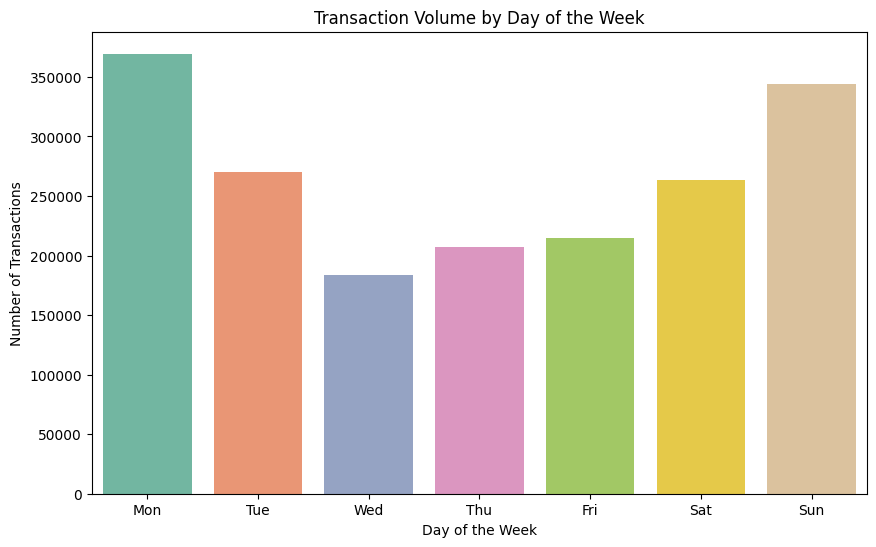

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='transaction_day_of_week', data=df, palette='Set2')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.title('Transaction Volume by Day of the Week')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


So here we can clearly see that sunday and monday have most transactions

In [29]:
df.head()

,trans_date_trans_time,cc_num,category,amt,gender,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,trans_date,tans_time,transaction_hour,day_night,transaction_day_of_week
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,2019-01-01,00:00:18,0,0,1
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,2019-01-01,00:00:44,0,0,1
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,2019-01-01,00:00:51,0,0,1
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,2019-01-01,00:01:16,0,0,1
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,2019-01-01,00:03:06,0,0,1


In [30]:
transactions_per_day = df.groupby("transaction_day_of_week").size()
transactions_per_day = transactions_per_day.reindex(range(7), fill_value=0)


# Plotting Transactions Over Time (Daily Transaction Count)
This plot shows how the number of transactions changes over time, which can help identify peak transaction periods or unusual activity.

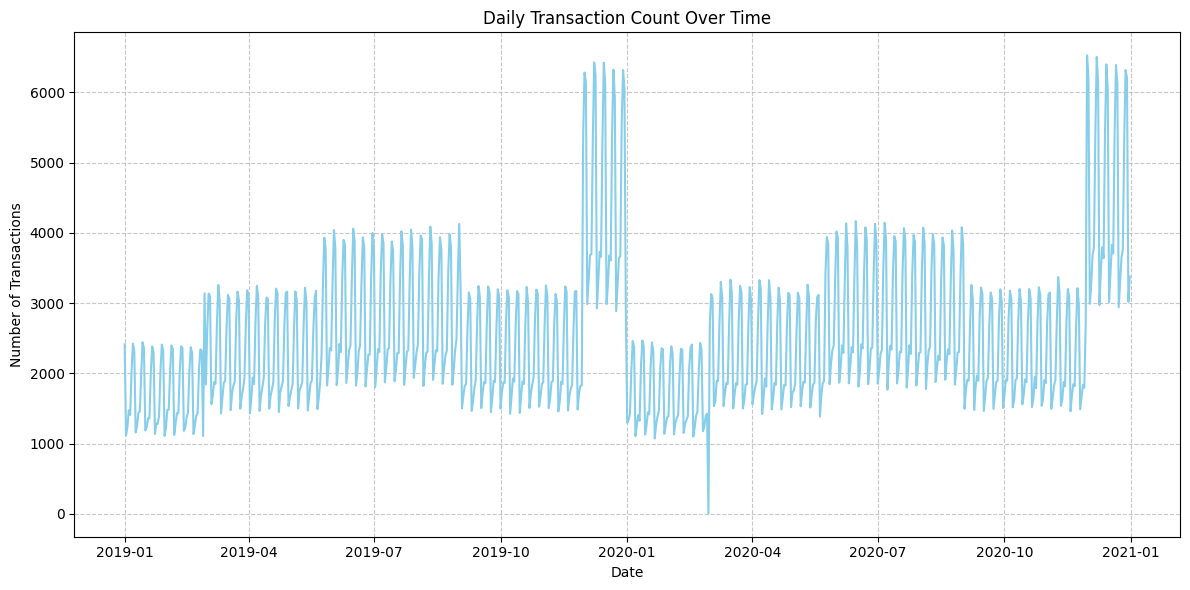

In [31]:
import matplotlib.pyplot as plt


daily_transactions = df.resample('D', on='trans_date_trans_time').size()

plt.figure(figsize=(12, 6))
plt.plot(daily_transactions.index, daily_transactions.values, color='skyblue', linewidth=1.5)
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Transaction Count Over Time')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The daily transaction count over time shows fluctuations, but without a clear upward or downward trend.  There are periods of higher and lower transaction volumes, but no consistent pattern is readily apparent from the provided visualization

since more transactions take place over the weekends, creatting a column is_weekend

In [32]:
df["is_weekend"] = df["transaction_day_of_week"].apply(lambda x: 1 if x in [5,6] else 0)


AMOUNT

In [33]:
print(df['amt'].describe())


count    1.852394e+06
mean     7.006357e+01
std      1.592540e+02
min      1.000000e+00
25%      9.640000e+00
50%      4.745000e+01
75%      8.310000e+01
max      2.894890e+04
Name: amt, dtype: float64


count: 1.852394e+06 (1,852,394)

This indicates the total number of non-null entries in the amt column, meaning there are 1,852,394 transaction records in the dataset.
mean: 7.006357e+01 (~70.06)

The average transaction amount is around 70.06. This is calculated by summing all the transaction amounts and dividing by the count.
std (Standard Deviation): 1.592540e+02 (~159.25)

This measures the spread of the transaction amounts around the mean. A high standard deviation relative to the mean (159.25 vs. 70.06) suggests that there is considerable variability in transaction amounts, with some transactions being much higher or lower than the average.
min: 1.000000e+00 (1.0)

The smallest transaction amount in the dataset is 1. This could be a small legitimate transaction or possibly a low-value anomaly.
25% (25th Percentile or 1st Quartile): 9.640000e+00 (9.64)

This is the transaction amount at the 25th percentile, meaning 25% of transactions are below 9.64. It represents the lower quartile of transaction amounts.
50% (50th Percentile or Median): 4.745000e+01 (47.45)

This is the median transaction amount. Half of the transactions are below this value and half are above. The median being lower than the mean suggests that the data is right-skewed, meaning there are some high-value transactions that increase the average.
75% (75th Percentile or 3rd Quartile): 8.310000e+01 (83.10)

This is the transaction amount at the 75th percentile. 75% of transactions are below this amount, and 25% are above. This also indicates that most transaction amounts are relatively small, with only a few larger amounts driving up the average.
max: 2.894890e+04 (28,948.9)

The maximum transaction amount in the dataset is 28,948.9. This is significantly higher than the mean, showing the presence of high-value transactions, which could be outliers or important observations for fraud analysis.


# Log transformation (adding 1 to avoid log(0) if there are zero values)

This transformation helps to reduce skewness and handle zero values in the data, making it more suitable for statistical modeling or analysis.

In [34]:
df['log_amt'] = np.log1p(df['amt'])

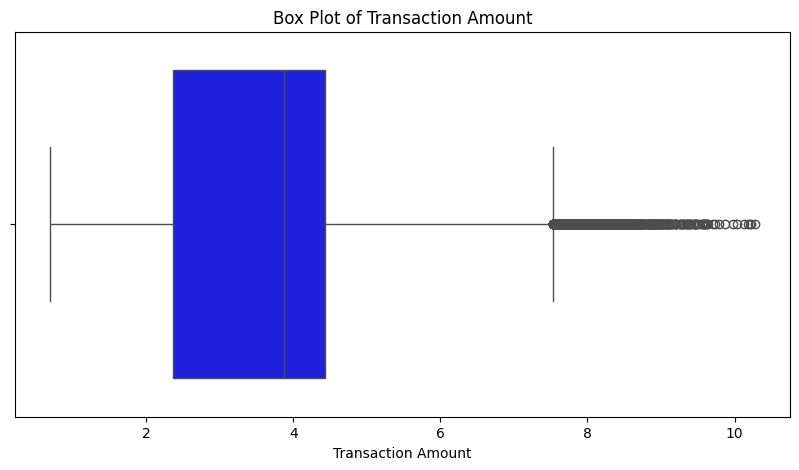

In [35]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['log_amt'], color='blue')
plt.xlabel('Transaction Amount')
plt.title('Box Plot of Transaction Amount')
plt.show()


The dots on the right side beyond the whisker are considered outliers. In the context of the log-transformed transaction amount, these are transactions with unusually high amounts.
Since the data is log-transformed, these outliers indicate very high transaction amounts when converted back to the original scale.

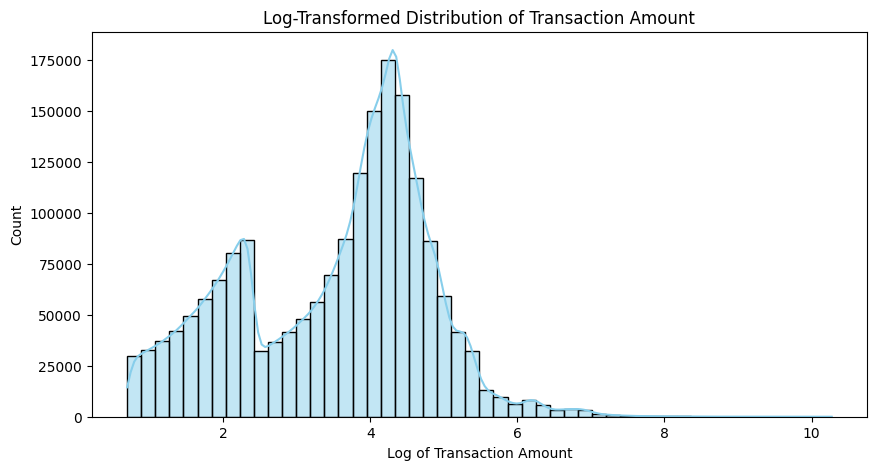

In [36]:
plt.figure(figsize=(10, 5))
sns.histplot(df['log_amt'], bins=50, kde=True, color='skyblue')
plt.xlabel('Log of Transaction Amount')
plt.title('Log-Transformed Distribution of Transaction Amount')
plt.show()




The log transformation of the transaction amount ('amt' column) significantly reduced the impact of outliers, making the distribution more symmetrical and closer to a normal distribution.

In [37]:
q1 = df['amt'].quantile(0.25)
median = df['amt'].median()
q3 = df['amt'].quantile(0.75)

bins = [0, q1, median, q3, df['amt'].max()]
labels = ['low', 'medium', 'high', 'very_high']

df['amt_category'] = pd.cut(df['amt'], bins=bins, labels=labels, include_lowest=True)


Relative Amount (Relative to User’s Average)

Calculating each transaction amount relative to the user’s average transaction amount. Unusually high or low amounts, relative to a user’s typical spending pattern, can be useful in detecting anomalies.

Here we calculates each user's relative spending. It first computes the average transaction amount for each user using groupby(). Then, it calculates the relative amount spent in each transaction by dividing the transaction amount by the user’s average, resulting in a normalized value for comparison.

In [38]:

user_avg_amt = df.groupby('cc_num')['amt'].transform('mean')
df['relative_amt'] = df['amt'] / user_avg_amt


In [39]:
df['trans_date'] = pd.to_datetime(df['trans_date'], errors='coerce')

In [40]:
df['trans_year'] = df['trans_date'].dt.year
df['trans_ymonth'] = df['trans_date'].dt.month
df['trans_day'] = df['trans_date'].dt.day


In [41]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'category', 'amt', 'gender', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'merch_lat', 'merch_long',
       'trans_date', 'tans_time', 'transaction_hour', 'day_night',
       'transaction_day_of_week', 'is_weekend', 'log_amt', 'amt_category',
       'relative_amt', 'trans_year', 'trans_ymonth', 'trans_day'],
      dtype='object')

In [42]:
df.head()

,trans_date_trans_time,cc_num,category,amt,gender,zip,lat,long,city_pop,job,...,transaction_hour,day_night,transaction_day_of_week,is_weekend,log_amt,amt_category,relative_amt,trans_year,trans_ymonth,trans_day
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,28654,36.0788,-81.1781,3495,"Psychologist, counselling",...,0,0,1,0,1.786747,low,0.055587,2019,1,1
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,99160,48.8878,-118.2105,149,Special educational needs teacher,...,0,0,1,0,4.684259,very_high,1.912154,2019,1,1
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,83252,42.1808,-112.2620,4154,Nature conservation officer,...,0,0,1,0,5.398660,very_high,3.147834,2019,1,1
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,59632,46.2306,-112.1138,1939,Patent attorney,...,0,0,1,0,3.828641,medium,0.561868,2019,1,1
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,24433,38.4207,-79.4629,99,Dance movement psychotherapist,...,0,0,1,0,3.760269,medium,0.440104,2019,1,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 25 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   trans_date_trans_time    datetime64[ns]
 1   cc_num                   int64         
 2   category                 object        
 3   amt                      float64       
 4   gender                   object        
 5   zip                      int64         
 6   lat                      float64       
 7   long                     float64       
 8   city_pop                 int64         
 9   job                      object        
 10  dob                      object        
 11  merch_lat                float64       
 12  merch_long               float64       
 13  trans_date               datetime64[ns]
 14  tans_time                object        
 15  transaction_hour         int32         
 16  day_night                object        
 17  transaction_day_of_week  in

# Map showing transaction locations

In [44]:
import folium
m = folium.Map(location=[df['merch_lat'].mean(), df['merch_long'].mean()], zoom_start=6)
for _, row in df.sample(1000).iterrows():
    folium.CircleMarker([row['merch_lat'], row['merch_long']], radius=2, color='blue').add_to(m)
m



**The map visualization displays the geographical distribution of 1000 sampled merchant locations from the transaction dataset.  It provides a spatial overview of transaction activity, allowing for the identification of clusters or areas with higher transaction density.**


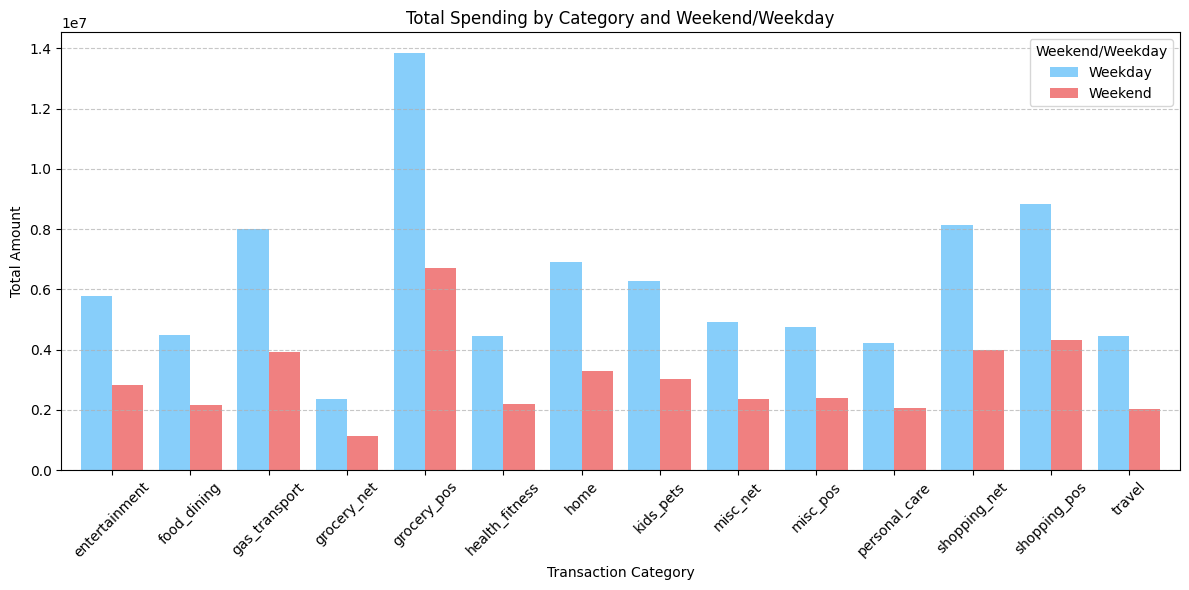

In [45]:

category_weekend = df.groupby(['category', 'is_weekend'])['amt'].sum().unstack()

fig, ax = plt.subplots(figsize=(12, 6))

category_weekend.plot(kind='bar', ax=ax, color=['lightskyblue', 'lightcoral'], width=0.8)

ax.set_title('Total Spending by Category and Weekend/Weekday')
ax.set_xlabel('Transaction Category')
ax.set_ylabel('Total Amount')
ax.legend(title='Weekend/Weekday', labels=['Weekday', 'Weekend'], loc='upper right')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


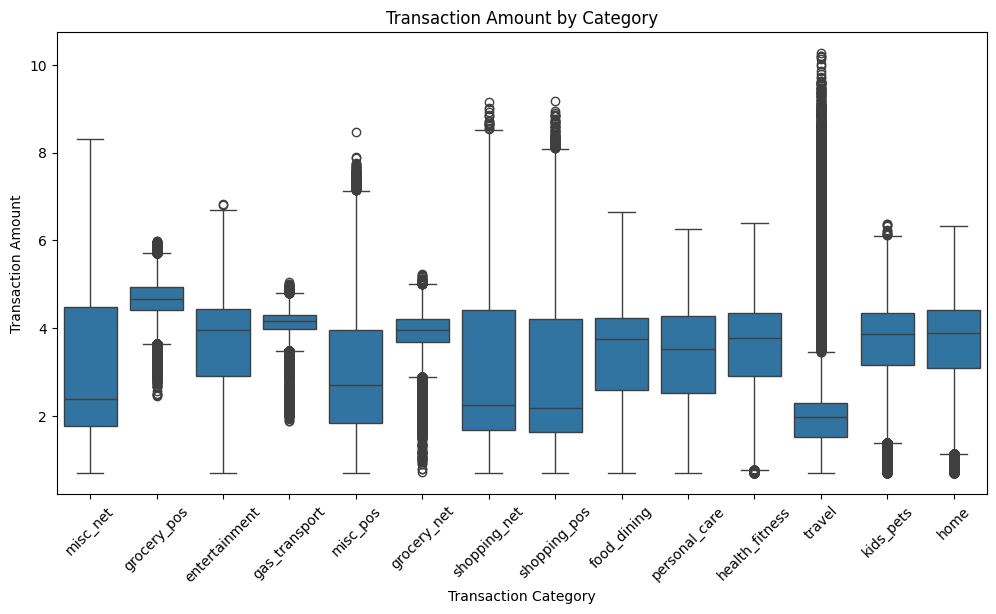

In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='log_amt', data=df)
plt.xlabel('Transaction Category')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount by Category')
plt.xticks(rotation=45)
plt.show()




The bar chart of total spending by category, separated by weekend and weekday, reveals spending patterns across different transaction categories.  Some categories show significantly higher spending on weekends compared to weekdays, while others might exhibit the opposite trend or no discernible difference.  This information can be valuable for understanding consumer behavior and potentially identifying fraudulent activities that deviate from typical spending habits on specific days of the week.


## Applying label encoder to category

In [47]:
df['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [48]:
lbe = LabelEncoder()
df['category'] = lbe.fit_transform(df['category'])

## Converting gender to 0 and 1

In [49]:
df['gender'] = lbe.fit_transform(df['gender'])

## Removing job for temporory

In [50]:
df = df.drop(columns='job')

In [51]:
df.head()

,trans_date_trans_time,cc_num,category,amt,gender,zip,lat,long,city_pop,dob,...,transaction_hour,day_night,transaction_day_of_week,is_weekend,log_amt,amt_category,relative_amt,trans_year,trans_ymonth,trans_day
0,2019-01-01 00:00:18,2703186189652095,8,4.97,0,28654,36.0788,-81.1781,3495,1988-03-09,...,0,0,1,0,1.786747,low,0.055587,2019,1,1
1,2019-01-01 00:00:44,630423337322,4,107.23,0,99160,48.8878,-118.2105,149,1978-06-21,...,0,0,1,0,4.684259,very_high,1.912154,2019,1,1
2,2019-01-01 00:00:51,38859492057661,0,220.11,1,83252,42.1808,-112.2620,4154,1962-01-19,...,0,0,1,0,5.398660,very_high,3.147834,2019,1,1
3,2019-01-01 00:01:16,3534093764340240,2,45.00,1,59632,46.2306,-112.1138,1939,1967-01-12,...,0,0,1,0,3.828641,medium,0.561868,2019,1,1
4,2019-01-01 00:03:06,375534208663984,9,41.96,1,24433,38.4207,-79.4629,99,1986-03-28,...,0,0,1,0,3.760269,medium,0.440104,2019,1,1


In [52]:
df['age'] =  df['trans_year'] - pd.to_datetime(df['dob'],errors='coerce').dt.year

In [53]:
df.head()

,trans_date_trans_time,cc_num,category,amt,gender,zip,lat,long,city_pop,dob,...,day_night,transaction_day_of_week,is_weekend,log_amt,amt_category,relative_amt,trans_year,trans_ymonth,trans_day,age
0,2019-01-01 00:00:18,2703186189652095,8,4.97,0,28654,36.0788,-81.1781,3495,1988-03-09,...,0,1,0,1.786747,low,0.055587,2019,1,1,31
1,2019-01-01 00:00:44,630423337322,4,107.23,0,99160,48.8878,-118.2105,149,1978-06-21,...,0,1,0,4.684259,very_high,1.912154,2019,1,1,41
2,2019-01-01 00:00:51,38859492057661,0,220.11,1,83252,42.1808,-112.2620,4154,1962-01-19,...,0,1,0,5.398660,very_high,3.147834,2019,1,1,57
3,2019-01-01 00:01:16,3534093764340240,2,45.00,1,59632,46.2306,-112.1138,1939,1967-01-12,...,0,1,0,3.828641,medium,0.561868,2019,1,1,52
4,2019-01-01 00:03:06,375534208663984,9,41.96,1,24433,38.4207,-79.4629,99,1986-03-28,...,0,1,0,3.760269,medium,0.440104,2019,1,1,33


In [54]:
def converting_to_min(data):

  arr = data.split(':')
  return (int(arr[0]) * 60) + (int(arr[1])) + (int(arr[2]) / 60)

df['trans_time_min'] = df['tans_time'].apply(converting_to_min)

In [55]:
df = df.drop(columns = 'dob')

In [56]:
df["day_night"]

,day_night
0,0
1,0
2,0
3,0
4,0
...,...
1852389,0
1852390,0
1852391,0
1852392,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 25 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   trans_date_trans_time    datetime64[ns]
 1   cc_num                   int64         
 2   category                 int64         
 3   amt                      float64       
 4   gender                   int64         
 5   zip                      int64         
 6   lat                      float64       
 7   long                     float64       
 8   city_pop                 int64         
 9   merch_lat                float64       
 10  merch_long               float64       
 11  trans_date               datetime64[ns]
 12  tans_time                object        
 13  transaction_hour         int32         
 14  day_night                object        
 15  transaction_day_of_week  int32         
 16  is_weekend               int64         
 17  log_amt                  fl

In [58]:
df['amt']

,amt
0,4.97
1,107.23
2,220.11
3,45.00
4,41.96
...,...
1852389,43.77
1852390,111.84
1852391,86.88
1852392,7.99


 Here we convert 'amt_category' values ('low', 'medium', 'high', 'very_high') into numbers (1 to 4). Using this mapping. This approach helps simplify categories for models by representing them as numbers, without complex encoding methods like one-hot encoding

In [59]:
category_mapping = {
    'low': 1,
    'medium': 2,
    'high': 3,
    'very_high': 4
}

df['amt_category_encoded'] = df['amt_category'].map(category_mapping)


print(df[['amt_category', 'amt_category_encoded']].head())



  amt_category amt_category_encoded
0          low                    1
1    very_high                    4
2    very_high                    4
3       medium                    2
4       medium                    2


In [60]:
df.head()

,trans_date_trans_time,cc_num,category,amt,gender,zip,lat,long,city_pop,merch_lat,...,is_weekend,log_amt,amt_category,relative_amt,trans_year,trans_ymonth,trans_day,age,trans_time_min,amt_category_encoded
0,2019-01-01 00:00:18,2703186189652095,8,4.97,0,28654,36.0788,-81.1781,3495,36.011293,...,0,1.786747,low,0.055587,2019,1,1,31,0.300000,1
1,2019-01-01 00:00:44,630423337322,4,107.23,0,99160,48.8878,-118.2105,149,49.159047,...,0,4.684259,very_high,1.912154,2019,1,1,41,0.733333,4
2,2019-01-01 00:00:51,38859492057661,0,220.11,1,83252,42.1808,-112.2620,4154,43.150704,...,0,5.398660,very_high,3.147834,2019,1,1,57,0.850000,4
3,2019-01-01 00:01:16,3534093764340240,2,45.00,1,59632,46.2306,-112.1138,1939,47.034331,...,0,3.828641,medium,0.561868,2019,1,1,52,1.266667,2
4,2019-01-01 00:03:06,375534208663984,9,41.96,1,24433,38.4207,-79.4629,99,38.674999,...,0,3.760269,medium,0.440104,2019,1,1,33,3.100000,2


In [61]:
df = df.drop(columns = 'amt_category')

# relative

In [62]:
df["cc_num"].value_counts()

,count
cc_num,
6538441737335434,4392
30270432095985,4392
6538891242532018,4386
4364010865167176,4386
4642255475285942,4386
...,...
4714017207228610634,7
4352307151555405069,7
180097223252063,7


In [63]:
label_encoder = LabelEncoder()

df['cc_num_encoded'] = label_encoder.fit_transform(df['cc_num'])

Here we drop 'trans_date_trans_time' column , we have already extracted all information



In [64]:
df.drop(columns='trans_date_trans_time',inplace=True)

In [65]:
df.head()

,cc_num,category,amt,gender,zip,lat,long,city_pop,merch_lat,merch_long,...,is_weekend,log_amt,relative_amt,trans_year,trans_ymonth,trans_day,age,trans_time_min,amt_category_encoded,cc_num_encoded
0,2703186189652095,8,4.97,0,28654,36.0788,-81.1781,3495,36.011293,-82.048315,...,0,1.786747,0.055587,2019,1,1,31,0.300000,1,454
1,630423337322,4,107.23,0,99160,48.8878,-118.2105,149,49.159047,-118.186462,...,0,4.684259,1.912154,2019,1,1,41,0.733333,4,44
2,38859492057661,0,220.11,1,83252,42.1808,-112.2620,4154,43.150704,-112.154481,...,0,5.398660,3.147834,2019,1,1,57,0.850000,4,241
3,3534093764340240,2,45.00,1,59632,46.2306,-112.1138,1939,47.034331,-112.561071,...,0,3.828641,0.561868,2019,1,1,52,1.266667,2,519
4,375534208663984,9,41.96,1,24433,38.4207,-79.4629,99,38.674999,-78.632459,...,0,3.760269,0.440104,2019,1,1,33,3.100000,2,377


Here we converted each of column into its respective data types and then drop unnecessary

In [66]:
df['tans_time'].dtype

dtype('O')

In [67]:
df['tans_time'] = pd.to_datetime(df['tans_time'],errors='coerce')

In [68]:
df['trans_min'] = df['tans_time'].dt.minute

In [69]:
df.drop(columns=['cc_num','amt','trans_date','tans_time','trans_time_min','zip'],inplace=True)

In [70]:
df.head()

,category,gender,lat,long,city_pop,merch_lat,merch_long,transaction_hour,day_night,transaction_day_of_week,is_weekend,log_amt,relative_amt,trans_year,trans_ymonth,trans_day,age,amt_category_encoded,cc_num_encoded,trans_min
0,8,0,36.0788,-81.1781,3495,36.011293,-82.048315,0,0,1,0,1.786747,0.055587,2019,1,1,31,1,454,0
1,4,0,48.8878,-118.2105,149,49.159047,-118.186462,0,0,1,0,4.684259,1.912154,2019,1,1,41,4,44,0
2,0,1,42.1808,-112.2620,4154,43.150704,-112.154481,0,0,1,0,5.398660,3.147834,2019,1,1,57,4,241,0
3,2,1,46.2306,-112.1138,1939,47.034331,-112.561071,0,0,1,0,3.828641,0.561868,2019,1,1,52,2,519,1
4,9,1,38.4207,-79.4629,99,38.674999,-78.632459,0,0,1,0,3.760269,0.440104,2019,1,1,33,2,377,3



##**StandardScaler**
StandardScaler standardizes features by removing the mean and scaling to unit variance.  It transforms data to have a mean of 0 and a standard deviation of 1. This is important when features have different scales.  we use StandardScaler when you want features with zero mean and unit variance.

## **MinMaxScaler**
MinMaxScaler scales features to a given range, typically 0 to 1. It transforms data by shifting and rescaling it so all values lie within the specified range. we use MinMaxScaler when you need features within a specific range. This is often useful for algorithms sensitive to feature magnitude, or when we want to prevent features with large values from dominating the model.






---



 So here we create two temporary dataframes and then apply standardsclater on latitue and longitude and mini max on category , age , city population and amount category

In [71]:
data = df[['lat', 'long', 'merch_lat', 'merch_long']]

In [72]:
df['day_night'] = df['day_night'].astype('int')

In [73]:
additional_data = df[['day_night','gender','log_amt']]

In [74]:
std = StandardScaler()
std_data = std.fit_transform(data)
std_data = pd.DataFrame(std_data,columns=data.columns)

In [75]:
columns_to_scale = ['category', 'age', 'city_pop']

scaler = MinMaxScaler()

min_max_data = scaler.fit_transform(df[columns_to_scale])
min_max_data = pd.DataFrame(min_max_data,columns=columns_to_scale)

In [76]:
std_data.head()

,lat,long,merch_lat,merch_long
0,-0.485167,0.658263,-0.495080,0.594463
1,2.040531,-2.035415,2.080082,-2.031915
2,0.718034,-1.602731,0.903268,-1.593535
3,1.516580,-1.591951,1.663928,-1.623084
4,-0.023388,0.783024,0.026642,0.842714


In [77]:
min_max_data.head()

,category,age,city_pop
0,0.615385,0.207317,0.001194
1,0.307692,0.329268,0.000043
2,0.000000,0.524390,0.001421
3,0.153846,0.463415,0.000659
4,0.692308,0.231707,0.000026


In [78]:
new_df = pd.concat([min_max_data,std_data,additional_data],axis=1)

In [79]:
new_df.head()

,category,age,city_pop,lat,long,merch_lat,merch_long,day_night,gender,log_amt
0,0.615385,0.207317,0.001194,-0.485167,0.658263,-0.495080,0.594463,0,0,1.786747
1,0.307692,0.329268,0.000043,2.040531,-2.035415,2.080082,-2.031915,0,0,4.684259
2,0.000000,0.524390,0.001421,0.718034,-1.602731,0.903268,-1.593535,0,1,5.398660
3,0.153846,0.463415,0.000659,1.516580,-1.591951,1.663928,-1.623084,0,1,3.828641
4,0.692308,0.231707,0.000026,-0.023388,0.783024,0.026642,0.842714,0,1,3.760269


In [80]:
new_df.head()

,category,age,city_pop,lat,long,merch_lat,merch_long,day_night,gender,log_amt
0,0.615385,0.207317,0.001194,-0.485167,0.658263,-0.495080,0.594463,0,0,1.786747
1,0.307692,0.329268,0.000043,2.040531,-2.035415,2.080082,-2.031915,0,0,4.684259
2,0.000000,0.524390,0.001421,0.718034,-1.602731,0.903268,-1.593535,0,1,5.398660
3,0.153846,0.463415,0.000659,1.516580,-1.591951,1.663928,-1.623084,0,1,3.828641
4,0.692308,0.231707,0.000026,-0.023388,0.783024,0.026642,0.842714,0,1,3.760269


### **PCA Principal component analysis** -



PCA (Principal Component Analysis) is a dimensionality reduction technique used to transform a large set of variables into a smaller set of uncorrelated variables called principal components.  These components capture the maximum variance in the data.  The first principal component accounts for the largest variance, the second for the second largest, and so on. In essence, it finds the directions of greatest variance in high-dimensional data and projects the data onto these directions, effectively reducing the number of dimensions while retaining most of the important information.


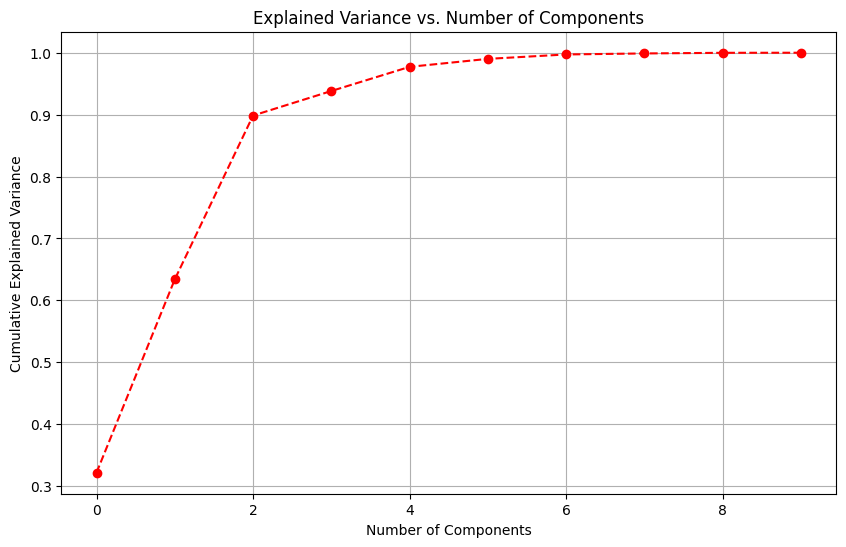

In [81]:
pca = PCA().fit(new_df)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='r')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


The chart shows that a few components capture most of the data's important information. Adding more components gives less extra value, meaning fewer components are enough to explain the data. So here we choose 2 components as it cover arround 90% of variance

In [82]:
pca = PCA(n_components=2)
pca_df = pca.fit_transform(new_df)


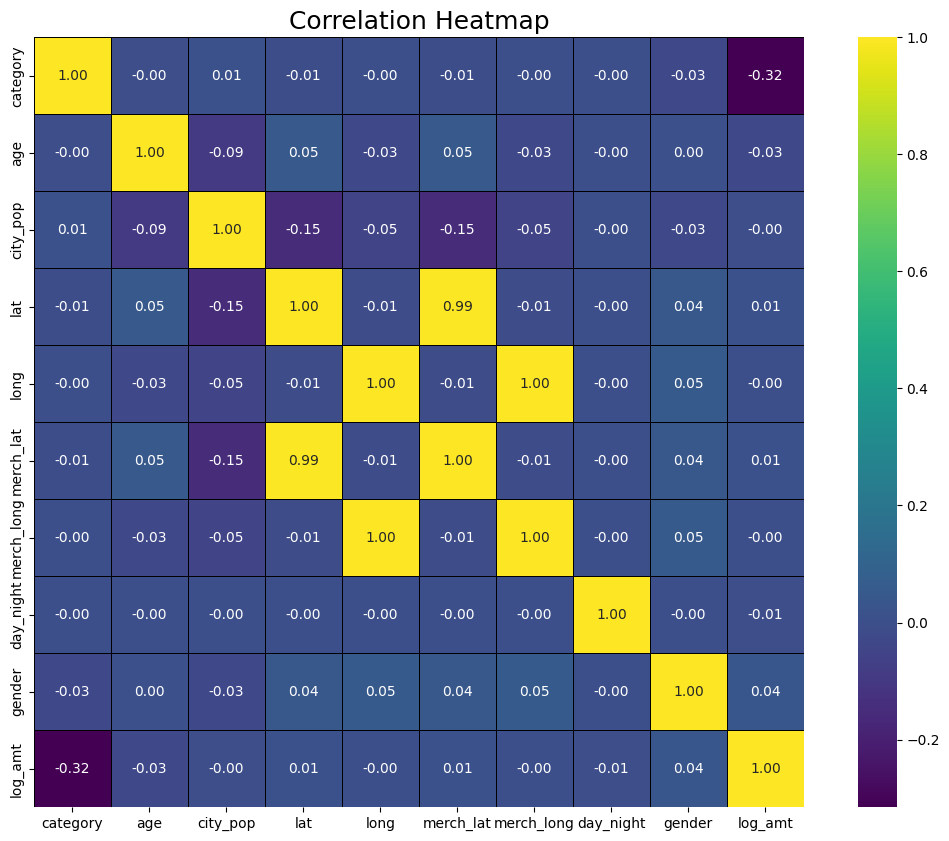

In [83]:
plt.figure(figsize=(14, 10))
correlation = new_df.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='viridis', square=True,
            linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap', fontsize=18)
plt.show()

The heatmap shows that most variables have low correlation with each other, as indicated by values near zero, except for lat and merch_lat (high positive correlation) and long and merch_long. This suggests a geographic relationship between cardholder and merchant locations.








### **K-Means Clustering**

K-Means Clustering is an unsupervised machine learning algorithm that groups data into K clusters based on similarity. It starts by randomly initializing K centroids, then assigns each data point to the nearest centroid. Afterward, the centroids are recalculated as the mean of the points in each cluster. This process is repeated until the centroids no longer change or convergence is reached. K-Means is simple to implement and works well with large datasets. However, it has some limitations, including the need to specify the number of clusters (K).


---


So we can use elbow method for finding number of clusters  as ->

The Elbow Method is a technique used to determine the optimal number of clusters (K) in K-Means clustering. It involves running the K-Means algorithm for a range of K values and plotting the inertia (sum of squared distances between points and their cluster centroids) against the number of clusters.

As K increases, the inertia decreases, but after a certain point, the rate of decrease slows down significantly, forming an "elbow" in the plot. The K value corresponding to this elbow is considered the optimal number of clusters, as it balances between having a good fit and avoiding overfitting.

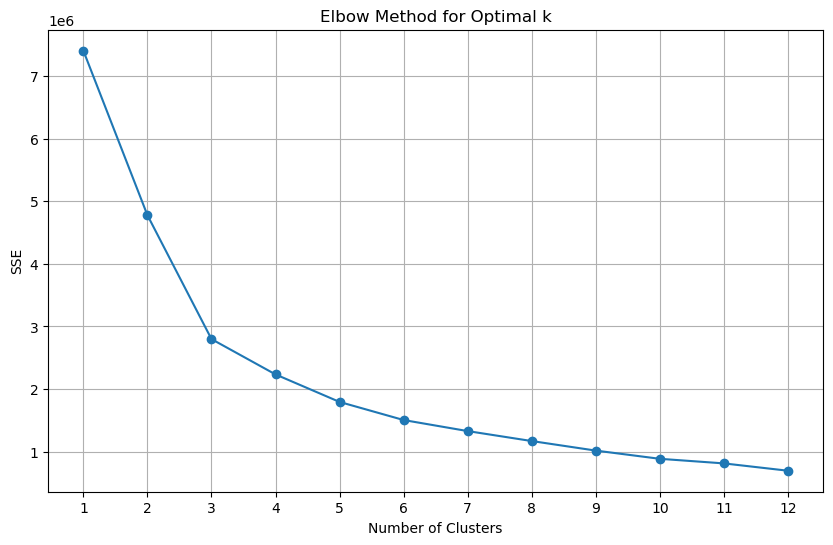

In [ ]:
k_values = np.arange(1,13)
SSE = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit_transform(pca_df)
    SSE.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, SSE, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.xticks(k_values)
plt.grid()
plt.show()


Conclusion:
*
The SSE decreases sharply as the number of clusters increases from 1 to around 4, then starts to level off, forming an "elbow" at K=4.





*  This suggests that 4 is the optimal number of clusters since adding more clusters beyond this point does not significantly improve the model's fit, balancing simplicity and accuracy.



here we performs K-Means clustering on data reduced to two principal components using PCA.

* First, the data is transformed into two principal components (pca1 and pca2) and stored in a DataFrame.
* Then, K-Means clustering with 4 clusters is applied to this reduced data. Each data point is assigned to a cluster, and the cluster labels are stored in the 'cluster' column.
* Afterward, the mean positions of each cluster are calculated to find the central points of each cluster in the PCA .
* and then results are visualized in a scatter plot where each point is colored according to its cluster, and the centroids are marked with red 'X' markers.

In [ ]:
pca_df = pd.DataFrame(data=pca_df, columns=['pca1', 'pca2'])
kmeans = KMeans(n_clusters=4, random_state=42)
pca_df['cluster'] = kmeans.fit_predict(pca_df)

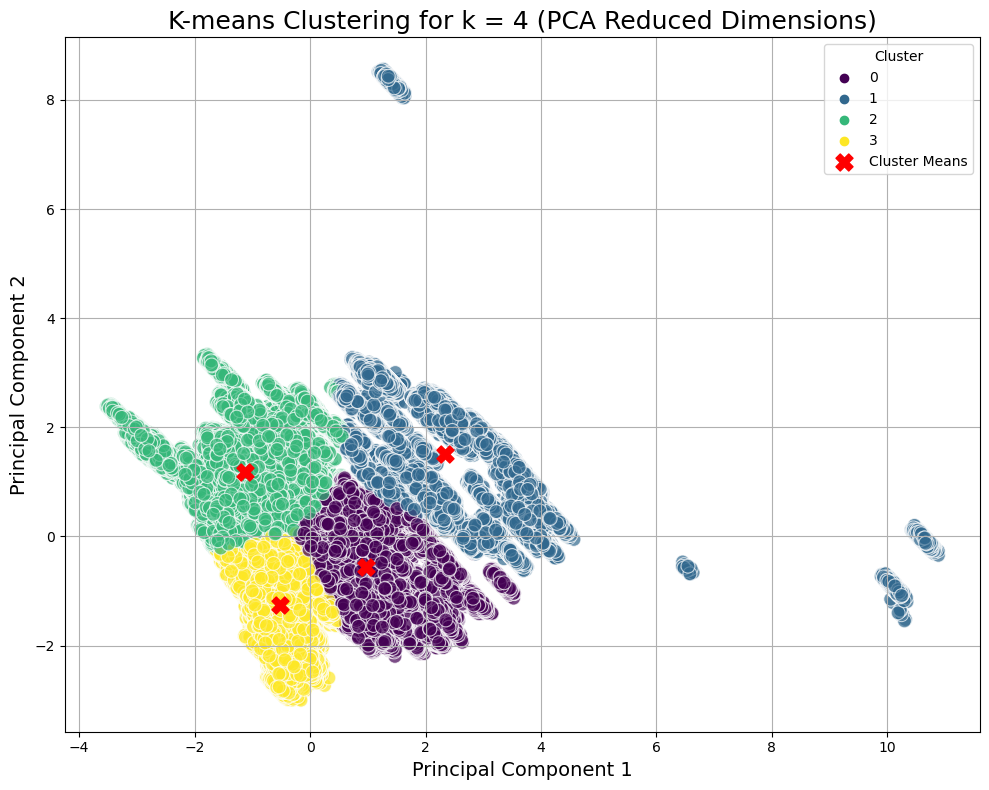

Cluster Centers in PCA space:
[[ 0.96496964 -0.56600852]
 [ 2.34220592  1.51402336]
 [-1.12804289  1.18117567]
 [-0.52428724 -1.26711837]]


In [ ]:
mean_positions = pca_df.groupby('cluster')[['pca1', 'pca2']].mean()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.scatter(mean_positions['pca1'], mean_positions['pca2'],
            s=150, c='red', label='Cluster Means', marker='X')
plt.title('K-means Clustering for k = 4 (PCA Reduced Dimensions)', fontsize=18)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Cluster', loc='best')
plt.grid()
plt.tight_layout()
plt.show()

pca_centers = kmeans.cluster_centers_

print("Cluster Centers in PCA space:")
print(pca_centers)

In [ ]:
SSE = kmeans.inertia_
print(f"Inertia: {SSE}")

Inertia: 2233987.7758957585


* The inertia is a measure of how well the data points fit their assigned clusters.
* It is computed as the sum of squared distances between each point and its assigned cluster centroid.
So inertia for pca1 2229320 pca2 795602382

# Since we have the clusters lets find out anomalies using mean + 3 standard deviation and if my points are out of that cluster then it means that that point is annomalies

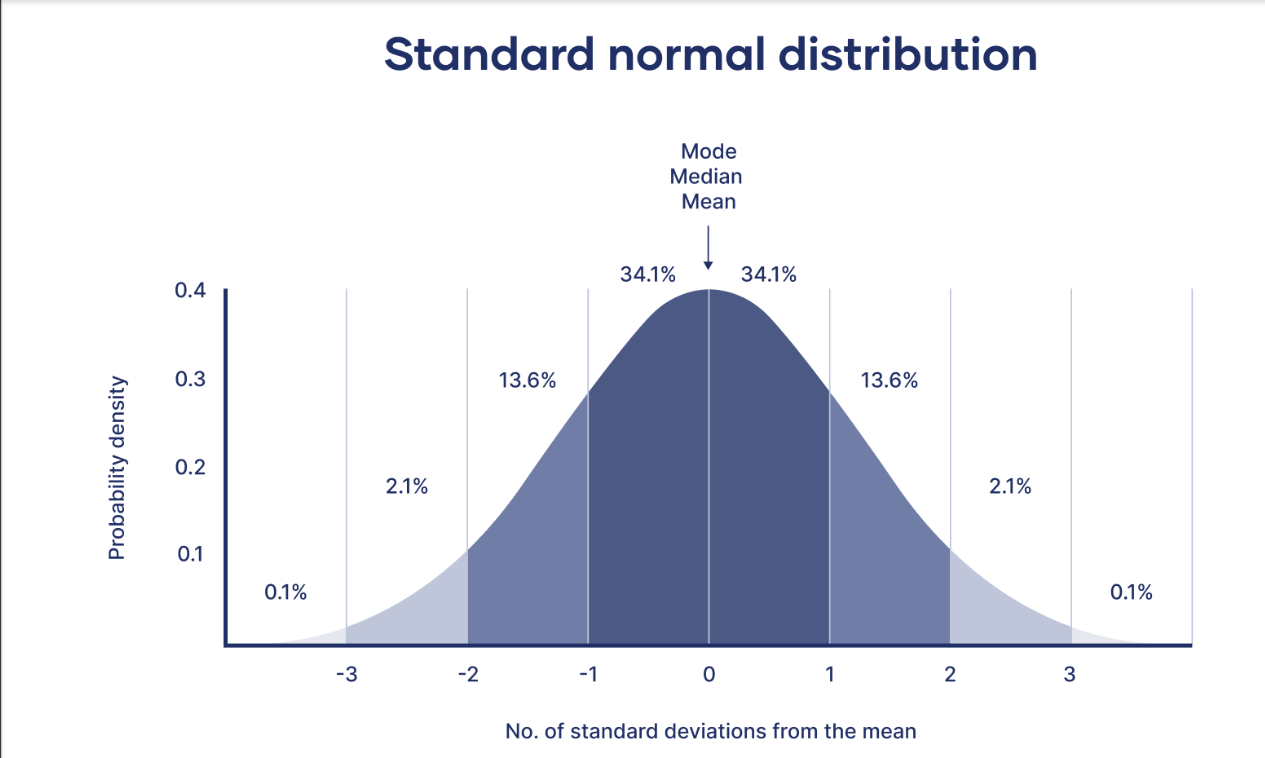

In [ ]:
pca_df.head()

,pca1,pca2,cluster
0,-1.190241,-0.001615,2
1,4.134111,-0.215153,1
2,2.510651,0.594424,1
3,3.205714,-0.127902,1
4,-0.834754,-0.808827,3


In [ ]:
def anomalies_detection(pca_df):

  arr = pca_df['cluster'].unique()

  anomalies = []

  for i in range(len(arr)):

    data = pca_df[pca_df['cluster'] == arr[i]]
    data = data.iloc[:,:2]
    mean_value = data.mean()
    std = std = data.std()
    threshold = 3

    deviation = abs(data - mean_value) > threshold * std
    cluster_anomalies = data[deviation.any(axis=1)].index
    anomalies.extend(cluster_anomalies)

  return anomalies


In [ ]:
anomalies = anomalies_detection(pca_df)

## Plot anomalies

In [ ]:
mean_positions = pca_df.groupby('cluster')[['pca1', 'pca2']].mean()

Here we generates a scatter plot that visualizes how K-Means clustering groups data in a reduced PCA space.

* First, it plots the data points based on the first two principal components (pca1 and pca2), with colors representing different clusters. The points are given a slight transparency to make the plot clearer.

* It then highlights the centroids (mean positions) of each cluster using large red 'X' markers, making it easy to see where the center of each cluster lies in the 2D space.

* Anomalies are shown as black circles with red borders, so they stand out from the rest of the points, indicating where the data deviates from the clusters.

* The plot includes a title and axis labels, describing the components in the PCA-reduced space. A legend differentiates between the clusters, centroids, and anomalies.

* Finally, a grid is added to help with readability, and the layout ensures everything fits well in the plot.

This visualization makes it easier to see how well the clustering algorithm performed, where the clusters are, and how anomalies are positioned in relation to them.

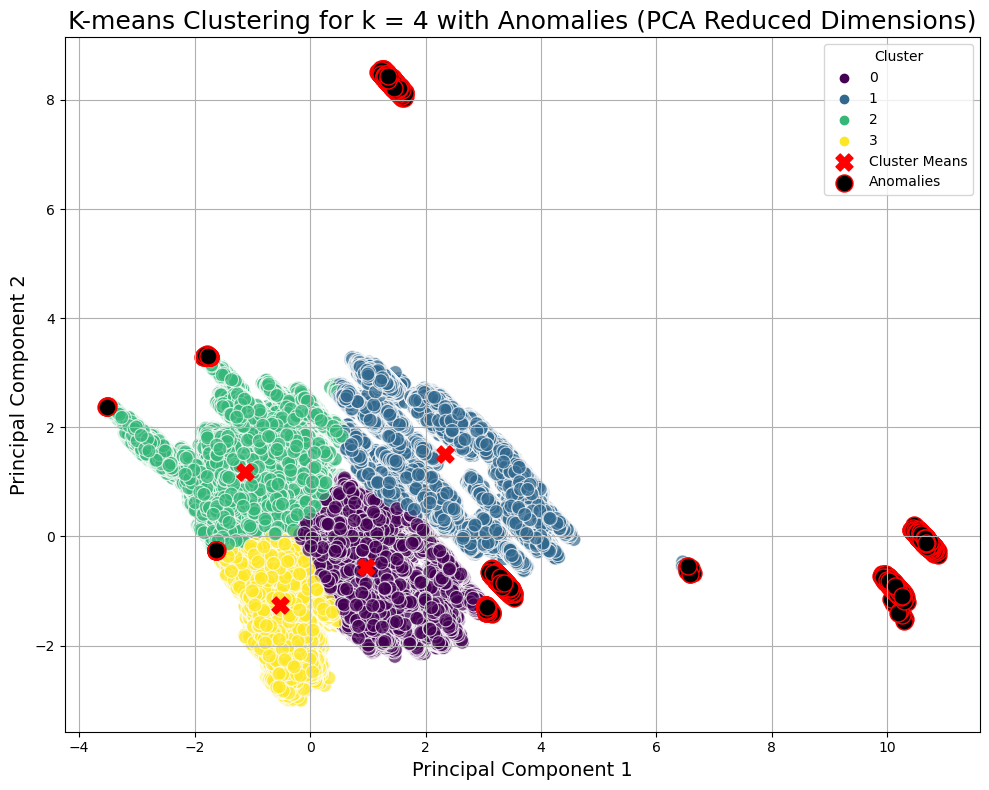

In [ ]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)

plt.scatter(mean_positions['pca1'], mean_positions['pca2'],
            s=150, c='red', label='Cluster Means', marker='X')

plt.scatter(pca_df.loc[anomalies, 'pca1'], pca_df.loc[anomalies, 'pca2'],
            s=150, c='black', marker='o', label='Anomalies', edgecolor='red')

plt.title('K-means Clustering for k = 4 with Anomalies (PCA Reduced Dimensions)', fontsize=18)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Cluster', loc='best')
plt.grid()
plt.tight_layout()
plt.show()


## Using the inverse transform from pca to analyze the distribution of the anomalies and non-anomalies clusters.

The Davies-Bouldin Index (DBI) is a metric for evaluating clustering performance. It calculates the average similarity ratio between each cluster and its most similar cluster. This ratio is based on the within-cluster distance and the between-cluster distance. A lower DBI indicates better clustering, as it reflects well-separated and compact clusters. A higher DBI indicates that the clusters are more dispersed or closer to each other.

In terms of interpretation:

* A DBI value close to 0 indicates good clustering (clusters are compact and well-separated).
* Higher values suggest that the clusters overlap or are not well-separated.
It is important to note that while DBI is a widely used metric, the specific interpretation also depends on the data, and lower values are preferred.

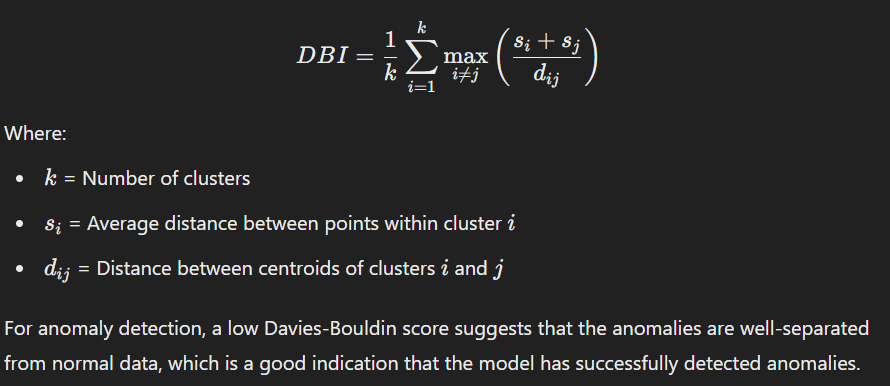

In [ ]:
dbi_full = davies_bouldin_score(pca_df.iloc[:,:-1], pca_df['cluster'])
print("Davies-Bouldin Index (Full Data):", dbi_full)

dbi_outliers = davies_bouldin_score(pca_df.iloc[:, :-1], pca_df['cluster'])
print("Davies-Bouldin Index (Outliers):", dbi_outliers)


Davies-Bouldin Index (Full Data): 0.8884745027158651
Davies-Bouldin Index (Outliers): 0.8884745027158651


The Calinski-Harabasz Index (CH Index) measures clustering quality by comparing between-cluster dispersion to within-cluster dispersion. A higher CH score indicates better clustering, where clusters are well-separated and compact. It's useful for comparing different clustering algorithms. A higher value suggests better-defined clusters
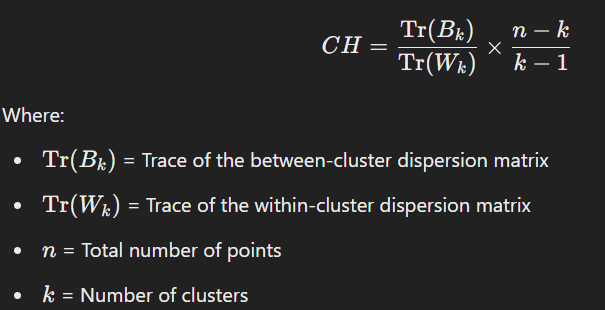



In [ ]:
X = pca_df.iloc[:, :-1].values
labels = pca_df['cluster'].values
ch_score = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz Index:", ch_score)


Calinski-Harabasz Index: 1428278.040661839


In [ ]:
pca_df.head()

,pca1,pca2,cluster
0,-1.190241,-0.001615,2
1,4.134111,-0.215153,1
2,2.510651,0.594424,1
3,3.205714,-0.127902,1
4,-0.834754,-0.808827,3


In [ ]:
new_data = pca_df
new_data['cluster'] = np.where(new_data.index.isin(anomalies), 1, 0)

In [ ]:
size_of_anomalies = len(anomalies)

In [ ]:
reconstruct_data = pca.inverse_transform(pca_df.iloc[:,:-1])

In [ ]:
labels = pca_df['cluster']

In [ ]:
columns = new_df.columns

In [ ]:
reconstruct_data = pd.DataFrame(reconstruct_data,columns=columns)

In [ ]:
reconstruct_data['is_fraud'] = labels

In [ ]:
reconstruct_data.head()

,category,age,city_pop,lat,long,merch_lat,merch_long,day_night,gender,log_amt,is_fraud
0,0.483506,0.383378,0.036255,-0.571072,0.617316,-0.570975,0.617296,0.498287,0.455385,3.484217,2
1,0.463535,0.426076,0.007998,2.097590,-2.037941,2.097270,-2.037869,0.498230,0.447194,3.707051,1
2,0.473145,0.411527,0.024918,0.899232,-1.586475,0.898983,-1.586445,0.498600,0.429207,3.604270,1
3,0.467253,0.418528,0.013483,1.606418,-1.599011,1.606167,-1.598957,0.498264,0.447246,3.665855,1
4,0.478421,0.387859,0.025524,0.016808,0.821515,0.016936,0.821516,0.497907,0.476657,3.536199,3


## After geting back the data using inverse transformation(overlooking the loss of some % of the original data) let's now see what was the change in fraud and non-fraud transaction

In [ ]:
new_df.shape

(1852394, 10)

In [ ]:
anomalies_data = new_df[new_df.index.isin(anomalies)]
anomalies_data['cluster_belonging'] = labels[labels.index.isin(anomalies)]

In [ ]:
success_transactions = new_df[~new_df.index.isin(anomalies)]
success_transactions['cluster_belonging'] = labels[~labels.index.isin(anomalies)]

In [ ]:
success_transactions.head()

,category,age,city_pop,lat,long,merch_lat,merch_long,day_night,gender,log_amt,cluster_belonging
0,0.615385,0.207317,0.001194,-0.485167,0.658263,-0.495080,0.594463,0,0,1.786747,2
1,0.307692,0.329268,0.000043,2.040531,-2.035415,2.080082,-2.031915,0,0,4.684259,1
2,0.000000,0.524390,0.001421,0.718034,-1.602731,0.903268,-1.593535,0,1,5.398660,1
3,0.153846,0.463415,0.000659,1.516580,-1.591951,1.663928,-1.623084,0,1,3.828641,1
4,0.692308,0.231707,0.000026,-0.023388,0.783024,0.026642,0.842714,0,1,3.760269,3


In [ ]:
anomalies_data.head()

,category,age,city_pop,lat,long,merch_lat,merch_long,day_night,gender,log_amt,cluster_belonging
28,0.307692,0.475610,0.001670,-3.639303,-4.746922,-3.717282,-4.783390,0,1,4.513274,1
215,0.307692,0.500000,0.000058,2.029686,-1.321531,2.083543,-1.346637,0,1,4.861671,0
236,0.846154,0.804878,0.000042,5.169368,-5.487712,5.187345,-5.517598,0,1,2.272126,1
256,0.000000,0.475610,0.001670,-3.639303,-4.746922,-3.436143,-4.734222,0,1,1.420696,1
433,0.153846,0.170732,0.000505,-3.650266,-4.738317,-3.785991,-4.719162,0,0,4.152928,1


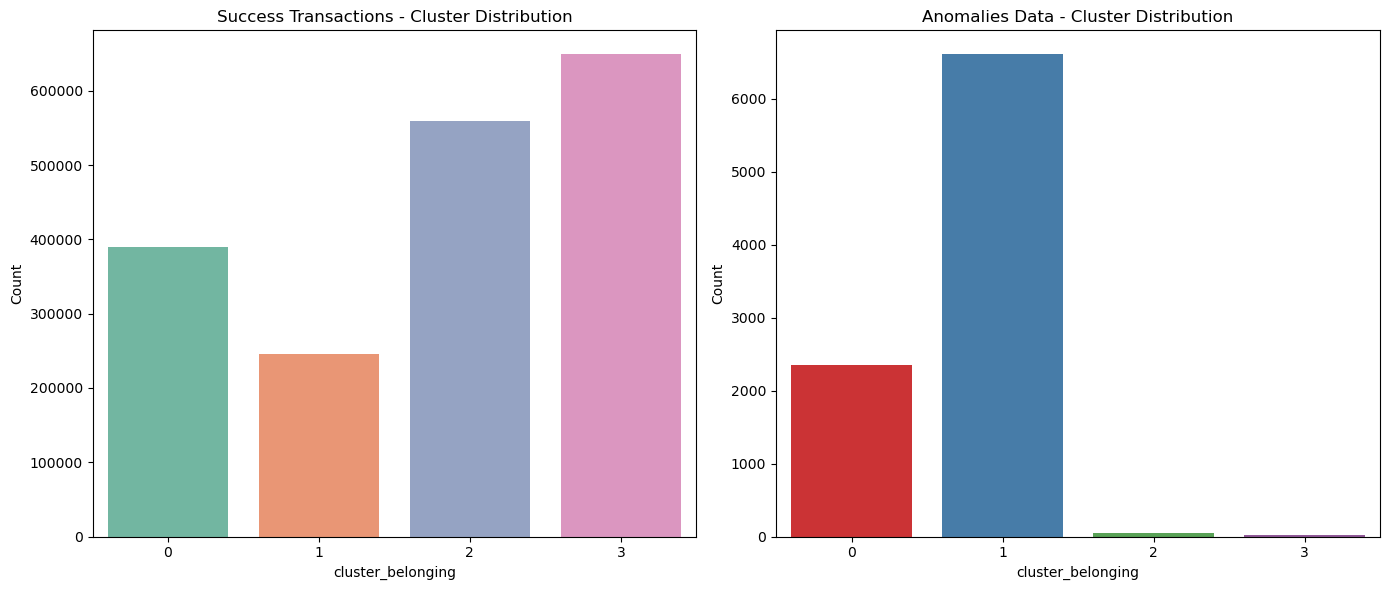

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(data=success_transactions, x='cluster_belonging', ax=axes[0], palette="Set2")
axes[0].set_title('Success Transactions - Cluster Distribution')
axes[0].set_ylabel('Count')

sns.countplot(data=anomalies_data, x='cluster_belonging', ax=axes[1], palette="Set1")
axes[1].set_title('Anomalies Data - Cluster Distribution')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


This is telling us that more anomalies are from cluster 0 and 1.

In [ ]:
cluster1_data = success_transactions[success_transactions['cluster_belonging'] == 0]
cluster1_anomalies_data = anomalies_data[anomalies_data['cluster_belonging'] == 0]

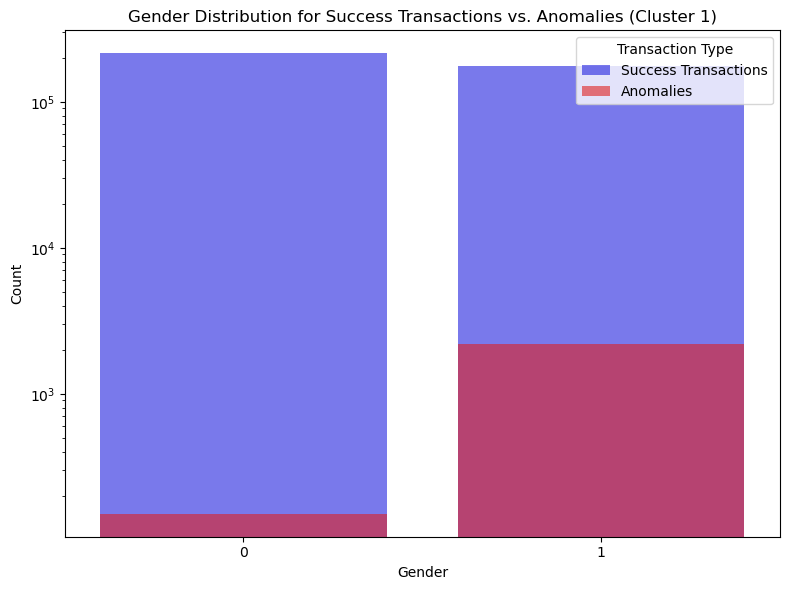

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(x='gender', data=cluster1_data, label='Success Transactions', color='blue', alpha=0.6)
sns.countplot(x='gender', data=cluster1_anomalies_data, label='Anomalies', color='red', alpha=0.6)

plt.title('Gender Distribution for Success Transactions vs. Anomalies (Cluster 1)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.yscale('log')
plt.legend(title='Transaction Type')
plt.tight_layout()
plt.show()


females have a significantly higher number of successful transactions than males
The difference in anomalies between male and female is less pronounced, though Gender 1 seems to have more anomalies relative to its successful transactions.

# **Now performing DBSCAN for anomalies**

# **Due to the high amount of instances (over 18 lacs), we have used statistical methods to deal with this situation.**

## Hyper parameter tuning for DBSCAN

## B => Which means that i want 95% confidence that my sample is good representation of population
## So n = (4*sd^2/B^2)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   category    float64
 1   age         float64
 2   city_pop    float64
 3   lat         float64
 4   long        float64
 5   merch_lat   float64
 6   merch_long  float64
 7   day_night   int32  
 8   gender      int32  
 9   log_amt     float64
dtypes: float64(8), int32(2)
memory usage: 127.2 MB


In [ ]:
population_std = new_df.std().mean()
population_mean = new_df.mean().mean()

This code helps calculate how much data is needed to estimate a population’s mean with a specific level of confidence.

* Setting Parameters: The confidence level (95%), margin of error (0.002), and z-score (2) are defined first.

* Sample Size Calculation: Using these parameters, the code calculates how many data points are required to get a reliable estimate of the population mean.

* Sampling Data: A random sample of the required size is then selected from the dataset.

* Calculating Sample Statistics: It calculates the average (mean) and the spread (standard deviation) of the sample. The standard error, which shows how much the sample mean is likely to vary, is also computed.

* Confidence Interval: The code calculates a 95% confidence interval for the sample mean. This tells us the range within which we can expect the true population mean to lie with 95% confidence.

* Displaying Results: The sample size, sample mean, standard deviation, standard error, and the confidence interval are printed. It also shows the population's mean and standard deviation for comparison.

* Sample Data: Finally, it shows a preview of the random sample selected from the data.

This process helps ensure that the sample size is large enough to provide accurate and reliable estimates of the population’s mean.

In [ ]:
confidence_level = 0.95
margin_of_error = 0.004
z_score = 2
2
n_required = int((z_score * population_std / margin_of_error) ** 2)
print(f"Calculated Sample Size: {n_required}")

np.random.seed(42)
subset_data = new_df.sample(n=n_required, random_state=42)

sample_mean = subset_data.mean().mean()
sample_std = subset_data.std().mean()
standard_error = sample_std / np.sqrt(n_required)

confidence_interval = (
    sample_mean - z_score * standard_error,
    sample_mean + z_score * standard_error
)

print(f"Sample Mean: {sample_mean:.4f}")
print(f"Sample Standard Deviation: {sample_std:.4f}")
print(f"Standard Error: {standard_error:.4f}")
print(f"{confidence_level*100}% Confidence Interval: {confidence_interval}")
print(f"Sample Data Shape: {subset_data.shape}")

print(f"population mean : {population_mean}")
print(f"population standard deviation : {population_std}")

subset_data.head()

Calculated Sample Size: 100515
Sample Mean: 0.4888
Sample Standard Deviation: 0.6344
Standard Error: 0.0020
95.0% Confidence Interval: (0.48483230789413306, 0.49283570751988887)
Sample Data Shape: (100515, 11)
population mean : 0.4900008893995693
population standard deviation : 0.6340848098318068


,category,age,city_pop,lat,long,merch_lat,merch_long,day_night,gender,log_amt,is_fault
1541144,0.153846,0.378049,0.006247,1.427750,-1.521402,1.319159,-1.556830,1,1,4.109397,0
1731581,0.923077,0.256098,0.026271,0.818656,1.386928,0.943533,1.396760,1,1,1.601406,0
354659,0.153846,0.951220,0.005602,0.800259,0.534302,0.750843,0.488377,1,0,3.954508,0
1493788,0.923077,0.158537,0.001768,-0.838812,-0.080432,-0.921652,-0.067614,0,0,1.118415,0
468148,1.000000,0.768293,0.434619,-1.137621,-0.473903,-1.190914,-0.461425,1,1,2.025513,0


Since, p(|𝜇 − 𝑥ˉ| < ϵ) = 0.95 where ϵ = 0.004 and standard error is negligible we can say that sample data is good representation of population
  

In [ ]:
new_df = new_df.drop(columns='is_fault')

In [ ]:
new_is_eval = subset_data['is_fault']

In [ ]:
subset_data = subset_data.drop(columns='is_fault')

In [ ]:
subset_data.head()

,category,age,city_pop,lat,long,merch_lat,merch_long,day_night,gender,log_amt
1541144,0.153846,0.378049,0.006247,1.427750,-1.521402,1.319159,-1.556830,1,1,4.109397
1731581,0.923077,0.256098,0.026271,0.818656,1.386928,0.943533,1.396760,1,1,1.601406
354659,0.153846,0.951220,0.005602,0.800259,0.534302,0.750843,0.488377,1,0,3.954508
1493788,0.923077,0.158537,0.001768,-0.838812,-0.080432,-0.921652,-0.067614,0,0,1.118415
468148,1.000000,0.768293,0.434619,-1.137621,-0.473903,-1.190914,-0.461425,1,1,2.025513


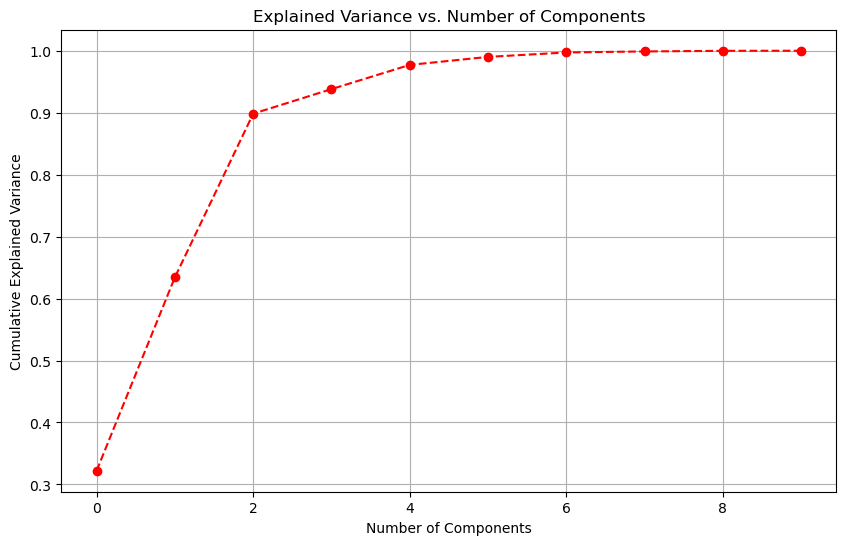

In [ ]:
pca = PCA().fit(subset_data)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='r')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


we can see that keeping n=2 components preserves 90% variance which would ideal as it would lead to easier visualization as well

In [ ]:
pca = PCA(n_components=2)
sample_pca_df = pca.fit_transform(subset_data)
sample_pca_df = pd.DataFrame(sample_pca_df,columns = ['pca1','pca2'])

In [ ]:
sample_pca_df.shape

(100515, 2)

In [ ]:
sample_pca_df.head()

,pca1,pca2
0,2.940356,0.170208
1,-0.579449,-2.246624
2,0.310500,-1.288841
3,-0.940697,1.013032
4,-0.792160,1.645009


## Since standard deviation of sample is close to zero we can say that random sampling is good representative of pouplation data. Now we can perform grid search to this sample data to save computational time

# **HYPER PARAMETER TUNING**

We have performed a hyperparameter tuning process to find the best parameters for the DBSCAN clustering algorithm using silhouette scores to evaluate the clustering performance.

* Hyperparameter Search: The eps (distance threshold) and min_samples (minimum points required for a cluster) values are defined in a dictionary. The code tests various combinations of these parameters.

* DBSCAN Clustering: For each combination of eps and min_samples, the DBSCAN algorithm is applied to the sample_pca_df data.

* Silhouette Score: The silhouette score, which measures how well-separated the clusters are, is calculated for each clustering result. The higher the score, the better the clustering performance.

* Tracking Best Parameters: The code keeps track of the best parameters (eps and min_samples) that lead to the highest silhouette score.

* Output: The best combination of parameters is printed along with its silhouette score, showing the optimal values for clustering the data.

This approach helps to find the most suitable DBSCAN parameters that result in the best clustering quality for the given dataset.








In [ ]:
hyper_parameters = {
    'eps': np.arange(0.5,0.8,0.1),
    'min_samples': [3,5,8]
}

best_score = -1
best_params = {}

for eps in hyper_parameters['eps']:
    eps = round(eps,2)
    for min_samples in hyper_parameters['min_samples']:
          db = DBSCAN(eps=eps, min_samples=min_samples)
          labels = db.fit_predict(sample_pca_df)
          if len(set(labels)) > 1:
              score = silhouette_score(sample_pca_df, labels)
              print(f"eps={eps}, min_samples={min_samples} : score={score}")
              if score > best_score:
                  best_score = score
                  best_params = {'eps': eps, 'min_samples': min_samples}

print(f"Best parameters: {best_params} with score {best_score}")

eps=0.5, min_samples=3 : score=0.6033952321476262
eps=0.5, min_samples=5 : score=0.6033952321476262
eps=0.5, min_samples=8 : score=0.6033952321476262
eps=0.6, min_samples=3 : score=0.6033952321476262
eps=0.6, min_samples=5 : score=0.6033952321476262
eps=0.6, min_samples=8 : score=0.6033952321476262
eps=0.7, min_samples=3 : score=0.6033952321476262
eps=0.7, min_samples=5 : score=0.6033952321476262
eps=0.7, min_samples=8 : score=0.6033952321476262
eps=0.8, min_samples=3 : score=0.6033952321476262
eps=0.8, min_samples=5 : score=0.6033952321476262
eps=0.8, min_samples=8 : score=0.6033952321476262
Best parameters: {'eps': 0.5, 'min_samples': 3} with score 0.6033952321476262


In [ ]:
db = DBSCAN(eps = 0.5, min_samples = 3)

In [ ]:
labels = db.fit_predict(sample_pca_df)

In [ ]:
sample_pca_df['cluster'] = labels

In [ ]:
sample_pca_df.shape

(100515, 3)

Here we visualizes the results of DBSCAN clustering on the PCA-reduced data, including both the identified clusters and any anomalies (outliers).

* Plotting Clusters: The scatter plot shows the points in the PCA space, with each point colored based on its assigned cluster. The colors are chosen from the 'viridis' palette, and the points are sized for clarity.

* Identifying Anomalies: Points identified as outliers by DBSCAN (labeled as -1) are plotted separately in black to distinguish them from the regular clusters.

* Plot Customization: The plot is titled "DBSCAN Clustering with Anomaly Detection." The x and y axes are labeled to indicate the first two principal components, and a color bar is added to show which color corresponds to each cluster label.

* Legend: A legend is included to differentiate between the clusters and the anomalies.

* Display: Finally, the plot is displayed, providing a clear visual representation of how DBSCAN has grouped the data and detected outliers.

This visualization helps to see both the structure of the clusters and any anomalies that may exist in the data, giving insights into the clustering results.








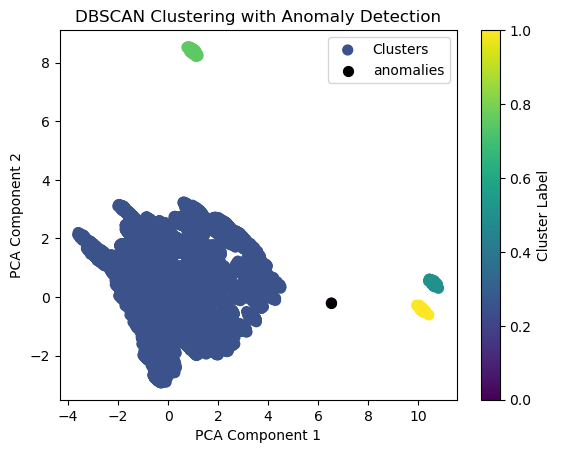

In [ ]:
colors = sns.color_palette('viridis', n_colors=len(set(labels)) - 1)

plt.scatter(sample_pca_df['pca1'],
            sample_pca_df['pca2'],
            c=sample_pca_df['cluster'],
            cmap='viridis',
            s=50, label="Clusters", zorder=1)

outliers = sample_pca_df[sample_pca_df['cluster'] == -1]
plt.scatter(outliers['pca1'], outliers['pca2'], c='black', s=50, label="anomalies", zorder=2)

plt.title("DBSCAN Clustering with Anomaly Detection")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.legend()
plt.show()


In [ ]:
dbi_full = davies_bouldin_score(sample_pca_df.iloc[:,:-1], sample_pca_df['cluster'])
print("Davies-Bouldin Index (Full Data):", dbi_full)

dbi_outliers = davies_bouldin_score(sample_pca_df.iloc[:, :-1], sample_pca_df['cluster'])
print("Davies-Bouldin Index (Outliers):", dbi_outliers)

Davies-Bouldin Index (Full Data): 0.2215267423956706
Davies-Bouldin Index (Outliers): 0.2215267423956706


In [ ]:
X = sample_pca_df.iloc[:, :-1].values
labels = sample_pca_df['cluster'].values
ch_score = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz Index:", ch_score)


Calinski-Harabasz Index: 2171.6730593053153


In [ ]:
db_cluster = dict(sample_pca_df['cluster'].value_counts())

In [ ]:
dbscan_eval = db_cluster[-1] / len(new_is_eval[new_is_eval == 1])
dbscan_eval

0.0018281535648994515

## Performing Gaussian mixture models

In [ ]:
pca_df.head()

,pca1,pca2,cluster
0,-1.122902,-0.069618,3
1,4.090540,-0.209433,1
2,2.444139,0.654929,1
3,3.193563,-0.148850,1
4,-0.852404,-0.789029,0


In [ ]:
pca_df = pca_df.drop(columns=['cluster'])

Here we creates a 3D plot to show how the data points are spread out in the reduced PCA space, giving a sense of the data’s density.

* Setting Up the Grid: The code takes the first two principal components (pca1 and pca2) from the dataset and sets up a grid of values using np.linspace. It creates evenly spaced values between the minimum and maximum of both components, forming a mesh grid (X, Y) to map the data points.

* Density Estimation: The gaussian_kde function is then used to estimate the density of the data points. It creates a smooth curve that represents how dense the data is in different parts of the space, helping to visualize where the data clusters.

* Plotting the 3D Surface: The density values are plotted as a 3D surface. The plot is shaded using a blue color map, and the surface is made slightly transparent to help highlight details.

* Axis Labels and Title: Labels are added to the axes to show that they represent the two principal components, and the plot is titled "3D Density Plot of PCA1 and PCA2" to explain what’s being shown.

* Displaying the Plot: Finally, the plot is displayed, giving a clear visual of where the data is dense and where there are fewer points.

This plot gives you a sense of how the data points are spread out in the reduced feature space, and it can help to identify where the majority of the data lies.

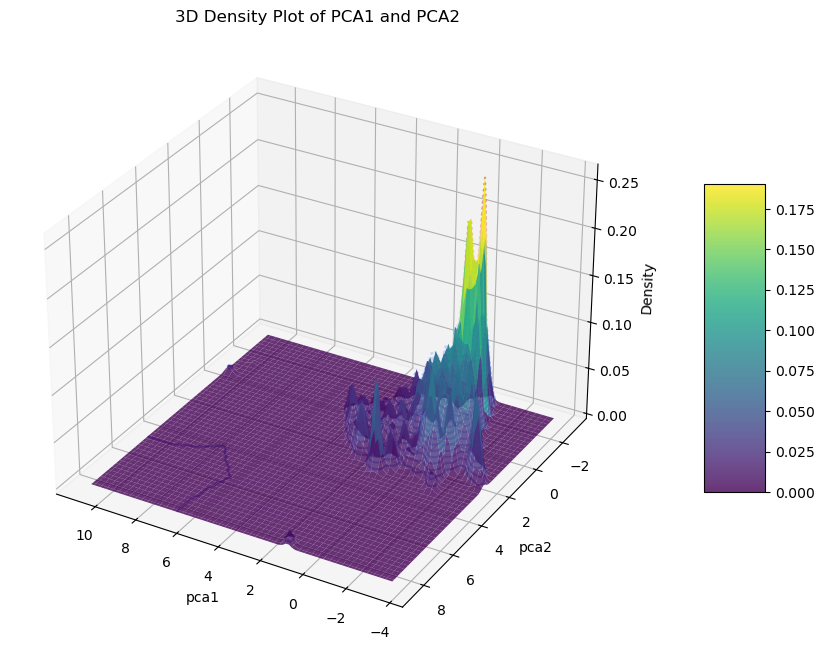

In [ ]:
pca1 = pca_df['pca1']
pca2 = pca_df['pca2']

x = np.linspace(min(pca1), max(pca1), 100)
y = np.linspace(min(pca2), max(pca2), 100)
X, Y = np.meshgrid(x, y)
positions = np.vstack([X.ravel(), Y.ravel()])

values = np.vstack([pca1, pca2])
kde = gaussian_kde(values)
Z = np.reshape(kde(positions).T, X.shape)

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)

ax.contour3D(X, Y, Z, 50, cmap='coolwarm', alpha=0.6)

ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_zlabel('Density')
ax.set_title('3D Density Plot of PCA1 and PCA2')

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

ax.view_init(elev=30, azim=120)

plt.show()

Here we uses the Bayesian Information Criterion (BIC) to find the optimal number of clusters for the Gaussian Mixture Model (GMM) applied to the PCA-reduced data.

* K Values Range: A range of cluster values (k_values) from 1 to 12 is defined. These represent the different possible numbers of clusters to test.

* Fitting the GMM: For each value of k, a Gaussian Mixture Model with k components is created and fit to the data (pca_df). The BIC for each model is calculated and stored.

* BIC Calculation: The BIC helps determine the best model by penalizing the complexity of the model (more clusters), ensuring that the chosen model is not overfitting the data.

* Plotting the BIC: The BIC values for each k are plotted to visualize the results. The x-axis shows the number of clusters, while the y-axis shows the BIC values. A marker is added for each data point to make the plot clearer.

* Title and Labels: The plot is titled "Elbow Method for Optimal k," with appropriate axis labels for the number of clusters and the BIC.

* Displaying the Plot: The plot is displayed using plt.show(), which helps in identifying the optimal k where the BIC starts to level off, indicating the best balance between model fit and complexity.

This method helps to choose the best number of clusters by balancing the model’s fit to the data and avoiding overfitting.

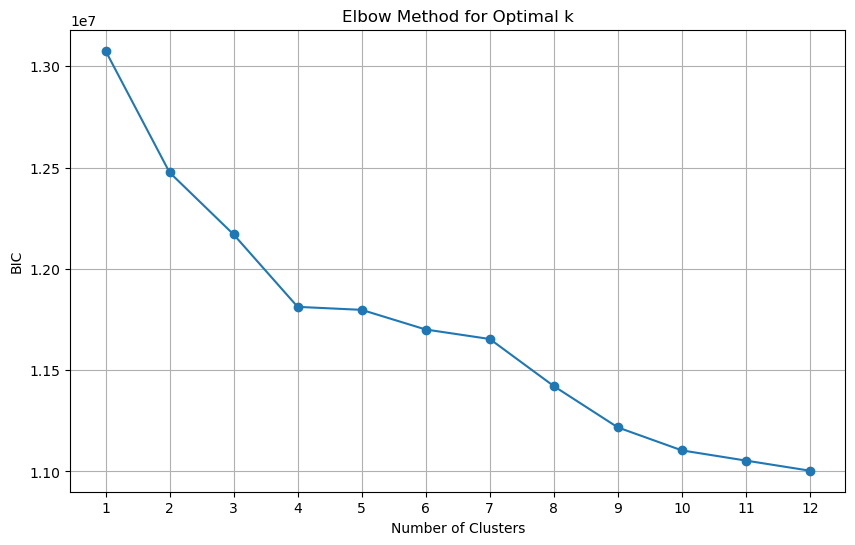

In [ ]:
k_values = np.arange(1,13)
BIC = []

for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(pca_df)
    BIC.append(gmm.bic(pca_df))

plt.figure(figsize=(10, 6))
plt.plot(k_values, BIC, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC')
plt.xticks(k_values)
plt.grid()
plt.show()

Gaussian Mixture Model (GMM) with 6 components to the first two principal components (pca1 and pca2) of the dataset. The model is initialized with a fixed random state for reproducibility.







In [ ]:

gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(pca_df[['pca1', 'pca2']])

GaussianMixture(n_components=4, random_state=42)

In this code we identifies outliers in the PCA-reduced data using the Mahalanobis distance, which measures how far each data point is from the mean of the distribution.

* Extracting Data: The first two principal components (pca1 and pca2) are extracted from the pca_df DataFrame and stored in data.

* Calculating Mean and Covariance: The mean vector of the data is calculated, and the covariance matrix is computed using np.cov. The inverse of the covariance matrix is then calculated using np.linalg.inv.

* Mahalanobis Distance: The Mahalanobis distance is calculated for each data point. This distance tells us how far a point is from the mean, considering the spread (variance) and correlation of the data.

* Outlier Detection: A threshold is set using the chi-squared distribution (chi2.ppf), and points with a Mahalanobis distance greater than this threshold are considered outliers.

* Displaying Outliers: The outliers DataFrame stores all points with a Mahalanobis distance above the threshold, and outliers.head() displays the first few outliers.

This approach helps identify data points that are significantly different from the majority, marking them as potential anomalies or outliers.

In [ ]:
data = pca_df[['pca1', 'pca2']]
mean_vector = data.mean().values
cov_matrix = np.cov(data.values, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

distances = [mahalanobis(row, mean_vector, inv_cov_matrix) for row in data.values]
threshold = np.sqrt(chi2.ppf(0.997, df=2))
outliers = data[np.array(distances) > threshold]

outliers.head()


,pca1,pca2
28,1.441260,8.323741
236,10.626853,-0.012681
256,1.428325,8.298061
433,1.351628,8.374135
671,10.737707,-0.202681


This code detects outliers in PCA-reduced data using the Mahalanobis distance, then visualizes the results in a 3D plot.

* Data Selection: The first two principal components, pca1 and pca2, are selected from the pca_df DataFrame.

* Gaussian Mixture Model (GMM): A Gaussian Mixture Model (GMM) with 6 components is fitted to the data. This helps estimate the data’s underlying distribution, providing means for each component.

* Calculating Mahalanobis Distance: The Mahalanobis distance is computed for each data point, which measures the distance of points from the mean, considering the data's covariance structure.

* Outlier Detection: A threshold is set based on the chi-squared distribution. Points with a Mahalanobis distance greater than this threshold are classified as outliers.

* 3D Visualization: A 3D scatter plot is created where normal points are displayed in blue and outliers in red. Though the data is 2D, a dummy z-axis is used for 3D visualization.

* Outlier Display: The detected outliers are printed and shown in the plot, helping to identify unusual points that significantly differ from the main data pattern.

This method uses statistical measures to effectively highlight anomalies in a visually clear manner

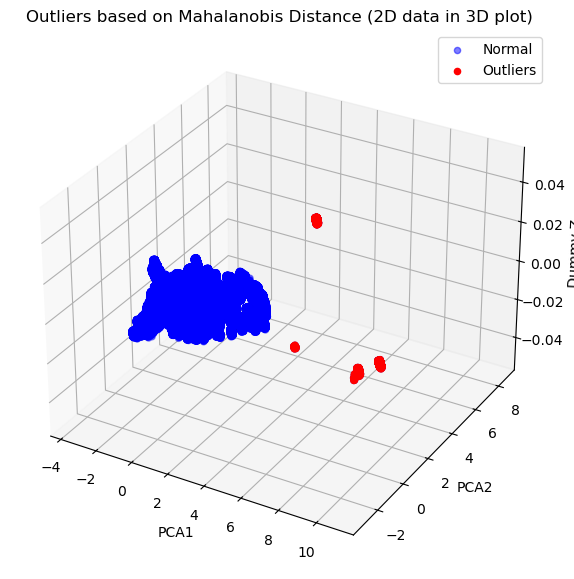

Outliers based on Mahalanobis distance:
              pca1      pca2
28        1.441260  8.323741
236      10.626853 -0.012681
256       1.428325  8.298061
433       1.351628  8.374135
671      10.737707 -0.202681
...            ...       ...
1852077   1.388174  8.429530
1852157   1.353178  8.372535
1852283  10.648318 -0.026838
1852288   1.354578  8.434028
1852386  10.662302 -0.124999

[6612 rows x 2 columns]


In [ ]:
data = pca_df[['pca1', 'pca2']]

gmm = GaussianMixture(n_components=4)
gmm.fit(data)

mean_vector = gmm.means_.mean(axis=0)
cov_matrix = np.cov(data.values.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)

distances = [mahalanobis(row, mean_vector, inv_cov_matrix) for row in data.values]

threshold = np.sqrt(chi2.ppf(0.997, df=2))

outliers = data[np.array(distances) > threshold]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['pca1'], data['pca2'], np.zeros_like(data['pca1']), c='blue', label='Normal', alpha=0.5)
ax.scatter(outliers['pca1'], outliers['pca2'], np.zeros_like(outliers['pca1']), c='red', label='Outliers', alpha=1.0)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('Dummy Z')
ax.set_title('Outliers based on Mahalanobis Distance (2D data in 3D plot)')
ax.legend()
plt.show()

print("Outliers based on Mahalanobis distance:")
print(outliers)


Here we applies Gaussian Mixture Model (GMM) clustering and detects anomalies using Mahalanobis distance in the PCA-reduced data. Here's a breakdown of what it does:

* Clustering with GMM: The Gaussian Mixture Model is used to predict cluster labels for the PCA-reduced data. The predicted cluster labels are added to the pca_df DataFrame as a new column, gmm_cluster.

* Calculating Mahalanobis Distance: The Mahalanobis distance for each data point is calculated to determine how far each point is from the mean of the data, considering the covariance.

* Threshold for Anomalies: The threshold for detecting anomalies is determined using the chi-squared distribution. Points with a Mahalanobis distance greater than the threshold are identified as outliers.

* Visualization: A scatter plot is created with the PCA components pca1 and pca2 on the axes. Data points are colored by their GMM cluster label, and outliers are marked in black. The plot includes a colorbar to indicate the cluster labels.

* Displaying Anomalies: The detected anomalies (outliers) are printed and shown in the plot, highlighting data points that significantly deviate from the rest of the data.

This method combines clustering and statistical outlier detection to identify and visualize unusual points in the dataset.

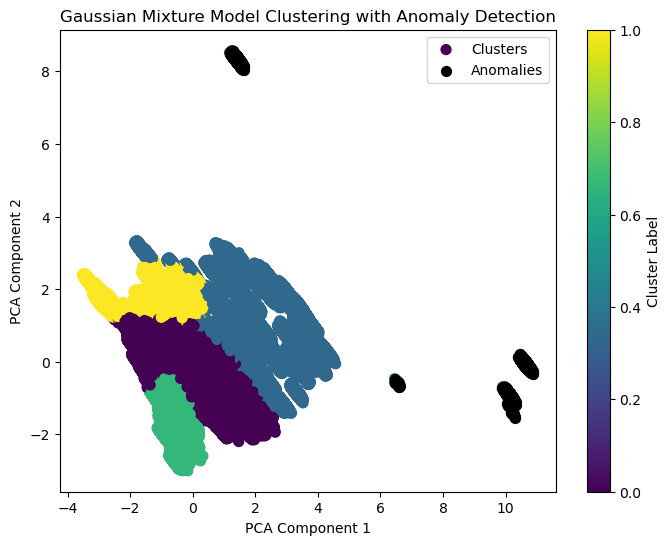

Anomalies based on Mahalanobis distance:
              pca1      pca2  gmm_cluster
28        1.441260  8.323741            1
236      10.626853 -0.012681            1
256       1.428325  8.298061            1
433       1.351628  8.374135            1
671      10.737707 -0.202681            1
...            ...       ...          ...
1852077   1.388174  8.429530            1
1852157   1.353178  8.372535            1
1852283  10.648318 -0.026838            1
1852288   1.354578  8.434028            1
1852386  10.662302 -0.124999            1

[6612 rows x 3 columns]


In [ ]:
pca_df['gmm_cluster'] = gmm.predict(data)

mean_vector = data.mean().values
cov_matrix = np.cov(data.values.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)

distances = [mahalanobis(row, mean_vector, inv_cov_matrix) for row in data.values]
threshold = np.sqrt(chi2.ppf(0.997, df=2))
outliers = pca_df[np.array(distances) > threshold]
colors = sns.color_palette('viridis', n_colors=5)

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['pca1'], pca_df['pca2'],
            c=pca_df['gmm_cluster'], cmap='viridis', s=50, label="Clusters", zorder=1)
plt.scatter(outliers['pca1'], outliers['pca2'], c='black', s=50, label="Anomalies", zorder=2)
plt.title("Gaussian Mixture Model Clustering with Anomaly Detection")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.legend()
plt.show()

print("Anomalies based on Mahalanobis distance:")
print(outliers)


In [ ]:
outliers.shape[0]

6612

In [ ]:
pca_df.head()

,pca1,pca2,gmm_cluster
0,-1.190241,-0.001615,0
1,4.134111,-0.215153,1
2,2.510651,0.594424,1
3,3.205714,-0.127902,1
4,-0.834754,-0.808827,2


In [ ]:
dbi_full = davies_bouldin_score(pca_df.iloc[:,:-1], pca_df['gmm_cluster'])
print("Davies-Bouldin Index (Full Data):", dbi_full)

dbi_outliers = davies_bouldin_score(pca_df.iloc[:, :-1], pca_df['gmm_cluster'])
print("Davies-Bouldin Index (Outliers):", dbi_outliers)


Davies-Bouldin Index (Full Data): 1.1017677145169622
Davies-Bouldin Index (Outliers): 1.1017677145169622


In [ ]:
X = pca_df.iloc[:, :-1].values
labels = pca_df['gmm_cluster'].values
ch_score = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz Index:", ch_score)


Calinski-Harabasz Index: 931406.810976605


## EVALUATION COMPARISION

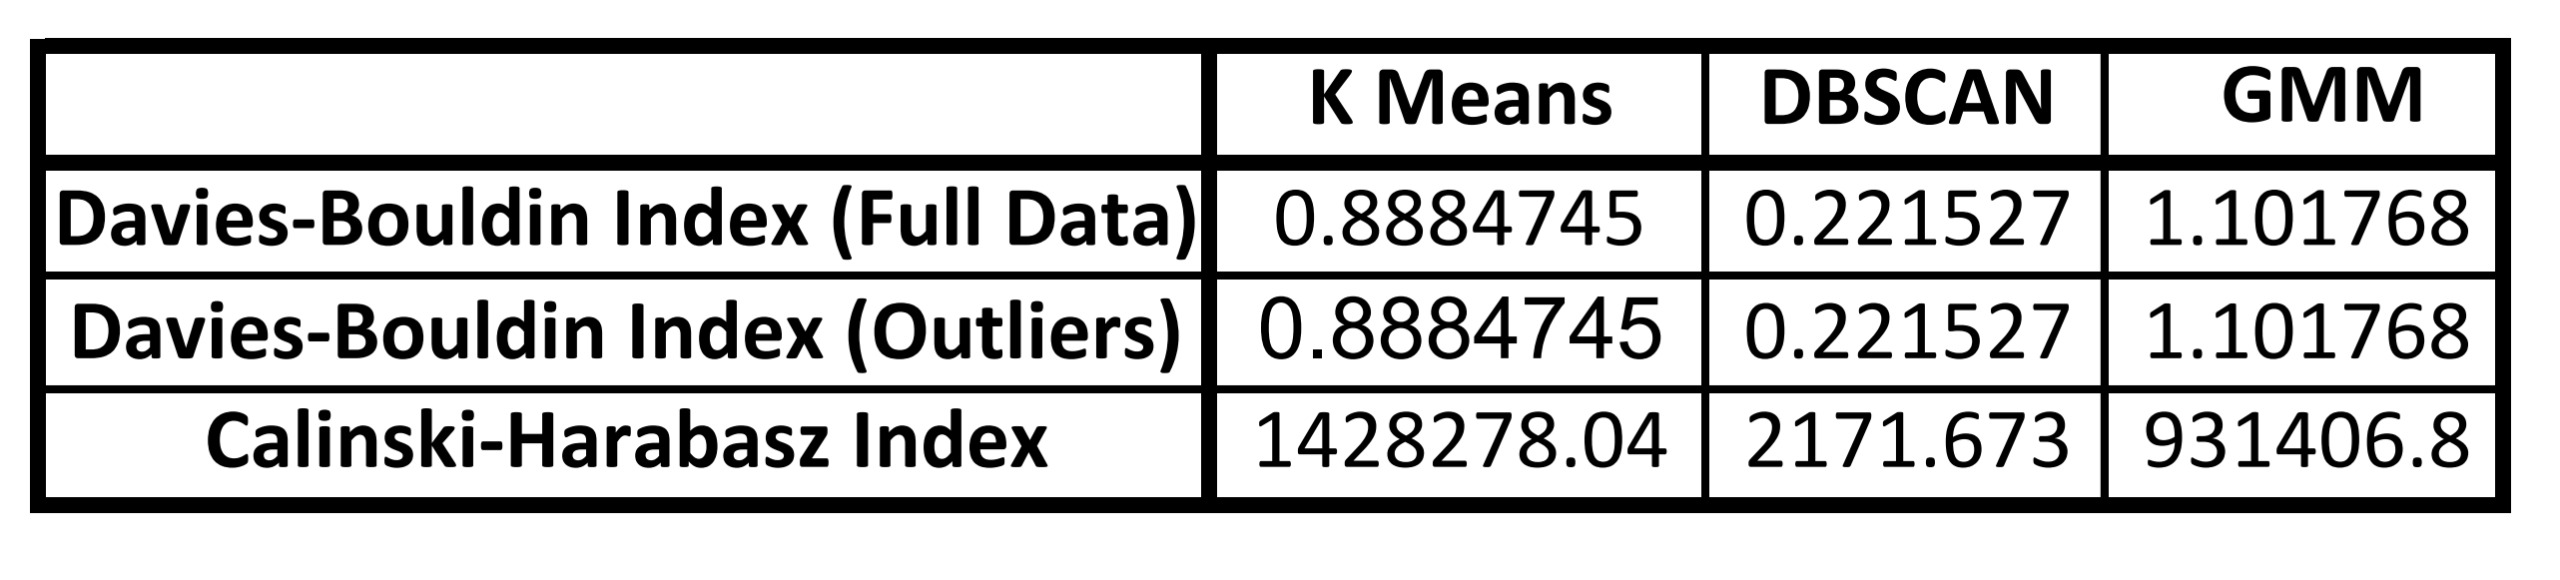

The table compares clustering models (K-Means, DBSCAN, and GMM) on two evaluation metrics (Davies-Bouldin and Calinski-Harabasz Index) for full data and outliers. K-Means shows a high Calinski-Harabasz score indicating strong cluster separation, while DBSCAN's Davies-Bouldin score is low, indicating better cluster compactness, but it struggles with outliers